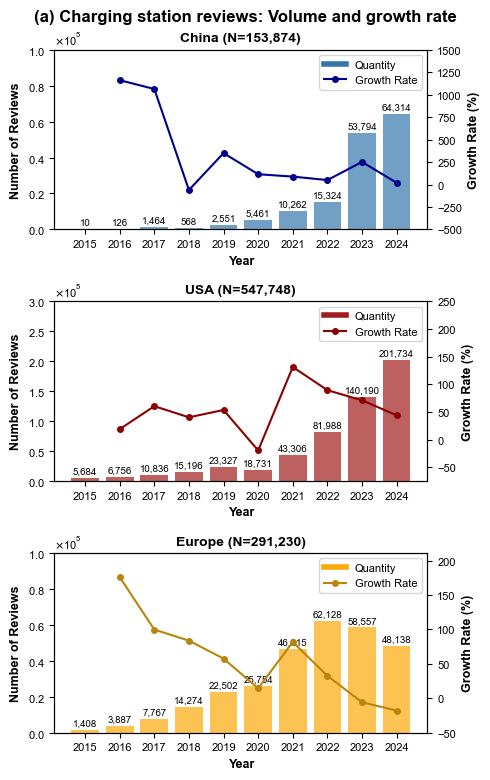

In [1]:
# Fig 1a

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
from scipy.stats import linregress
import json

rcParams['font.family'] = 'Arial'
with open('C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_1_a.json', 'r', encoding='utf-8') as f:
    region_data1 = json.load(f)

additional_data1 = {
    'China': {
        'color': '#3776ab',
        'line_color': 'darkblue',
        'rate_range': (-500, 1500) 
    },
    'USA': {
        'color': '#a11c1c',
        'line_color': 'darkred',
        'rate_range': (-75, 250) 
    },
    'Europe': {
        'color': '#fbaa08',
        'line_color': 'darkgoldenrod',
        'rate_range': (-50, None) 
    }
}

for region in ['China', 'USA', 'Europe']:
    if region in region_data1:
        region_data1[region].update(additional_data1[region])

for region, data in region_data1.items():
    slope, _, _, _, _ = linregress(data['years'], data['counts'])
    data['slope'] = slope

plt.rcParams.update({
    'axes.titlesize': 10,
    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
})

fig, axes = plt.subplots(3, 1, figsize=(5, 8))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("(a) Charging station reviews: Volume and growth rate", y=0.97, fontsize=12, fontweight='bold') 

for ax, (region, region_data) in zip(axes, region_data1.items()):
    years = region_data['years']
    counts = region_data['counts']
    rates = region_data['rates']
    
    bars = ax.bar(years, counts, color=region_data['color'], alpha=0.7, zorder=1)
    
    for year, count in zip(years, counts):
        ax.text(year, count + max(counts)*0.02, f'{count:,}',
                ha='center', va='bottom', fontsize=7,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1),
                zorder=3)
    
    ax_rate = ax.twinx()
    
    ax_rate.plot(years[1:], rates, 
                color=region_data['line_color'], linestyle='-', 
                linewidth=1.5, marker='o', markersize=4,
                label='Growth Rate (%)')
    
    rate_range = region_data['rate_range']
    if rate_range[1] is None:
        ax_rate.set_ylim(rate_range[0], max(rates)*1.2)
    else:
        ax_rate.set_ylim(rate_range[0], rate_range[1])
    
    ax.set_xlabel('Year', fontsize=9, weight='bold')
    ax.set_ylabel('Number of Reviews', fontsize=9, weight='bold')
    ax_rate.set_ylabel('Growth Rate (%)', fontsize=9, weight='bold')
    ax.set_title(f'{region} (N={region_data["total"]:,})', fontsize=10, weight='bold')
   # ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_xticks(years)
    
    if region == 'China':
        ax.set_ylim(0, 100000) 
    elif region == 'USA':
        ax.set_ylim(0, 300000)   
    elif region == 'Europe':
        ax.set_ylim(0, 100000) 
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 4))
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.offsetText.set_fontsize(8)
    
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color=region_data['color'], lw=4, label='Quantity'),
        Line2D([0], [0], color=region_data['line_color'], linestyle='-', 
              lw=1.5, marker='o', markersize=4, label='Growth Rate')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig('C:/Users/justi/Downloads/fig_1_a.png', dpi=500, bbox_inches='tight')
plt.show()

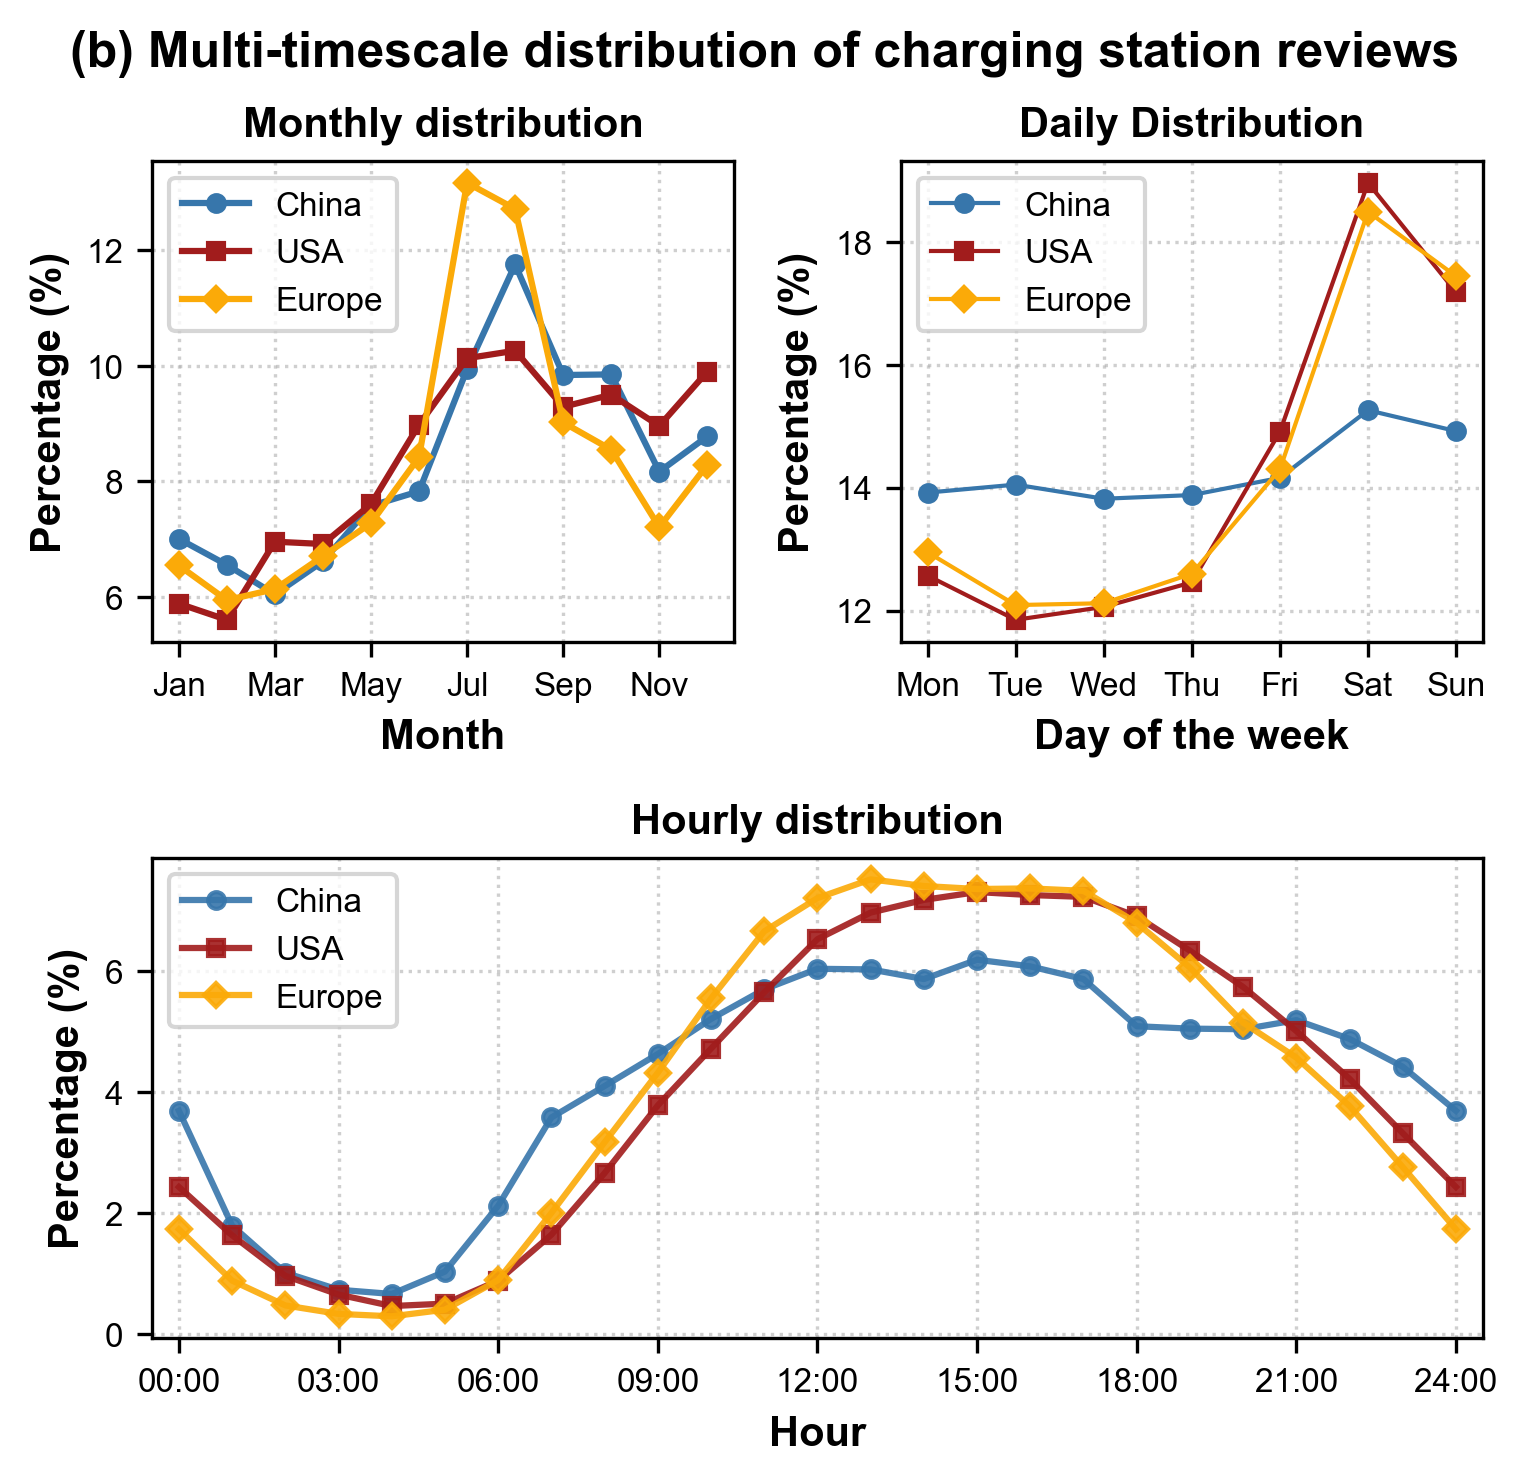

In [1]:
# Fig 1b

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import json

plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({
    'axes.titlesize': 10,
    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
})

with open('C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_1_b.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

colors = {'China': '#3776ab', 'USA': '#a11c1c', 'Europe': '#fbaa08'}
markers = {'China': 'o', 'USA': 's', 'Europe': 'D'}

fig = plt.figure(figsize=(5.2, 5.1), dpi=300)
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])
fig.suptitle("(b) Multi-timescale distribution of charging station reviews", y=0.96, fontsize=12, fontweight='bold')
plt.subplots_adjust(hspace=0.5)

# Weekly
ax1 = plt.subplot(gs[0, 1])
for region in ['China', 'USA', 'Europe']:
    ax1.plot(data['weekday']['names'],
             data['weekday'][region],
             label=region,
             color=colors[region],
             marker=markers[region],
             markersize=4,
             linewidth=1)
ax1.set_title("Daily Distribution", weight='bold')
ax1.set_ylabel("Percentage (%)", weight='bold')
ax1.set_xlabel("Day of the week",  weight='bold')
ax1.tick_params(axis='both', which='major')
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend(fontsize=8, framealpha=0.8, loc='upper left')

# Monthly
ax2 = plt.subplot(gs[0, 0])
for region in ['China', 'USA', 'Europe']:
    ax2.plot(data['month']['names'],
             data['month'][region],
             color=colors[region],
             marker=markers[region],
             markersize=4,
             linewidth=1.5,
             label=region)
ax2.set_title("Monthly distribution", weight='bold')
ax2.set_ylabel("Percentage (%)", weight='bold')
ax2.tick_params(axis='both', which='major')
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.set_xlabel("Month", weight='bold')
ax2.legend(fontsize=8, framealpha=0.8, loc='upper left')
month_indices = np.arange(0, 12, 2)
month_labels = [data['month']['names'][i] for i in month_indices]
ax2.set_xticks(month_indices)
ax2.set_xticklabels(month_labels)

# Hourly: show 0:00 through 24:00 with no gap
ax3 = plt.subplot(gs[1, :])
for region in ['China', 'USA', 'Europe']:
    y_hour = data['hour'][region]
    # If you want the curve to close at 24:00, append 0th value at the end:
    y_plot = y_hour + [y_hour[0]] if len(y_hour) == 24 else y_hour
    ax3.plot(
        np.arange(25),  # 0..24
        y_plot,
        color=colors[region],
        marker=markers[region],
        markersize=4,
        linewidth=1.5,
        alpha=0.9,
        label=region
    )
ax3.set_title("Hourly distribution", weight='bold')
ax3.set_ylabel("Percentage (%)", weight='bold')
ax3.tick_params(axis='both', which='major')
ax3.grid(True, linestyle=':', alpha=0.6)
ax3.set_xlabel("Hour", weight='bold')

# X-axis: ticks at every 3 hours, including 0 and 24
ax3.set_xticks(np.arange(0, 25, 3))
ax3.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 3)])
ax3.set_xlim(-0.5, 24.5)  # No gap

ax3.legend(fontsize=8, framealpha=0.8, loc='upper left')

plt.tight_layout()
plt.savefig("C:/Users/justi/Downloads/fig_1_b.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_4372\750803277.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0, w_pad=0)


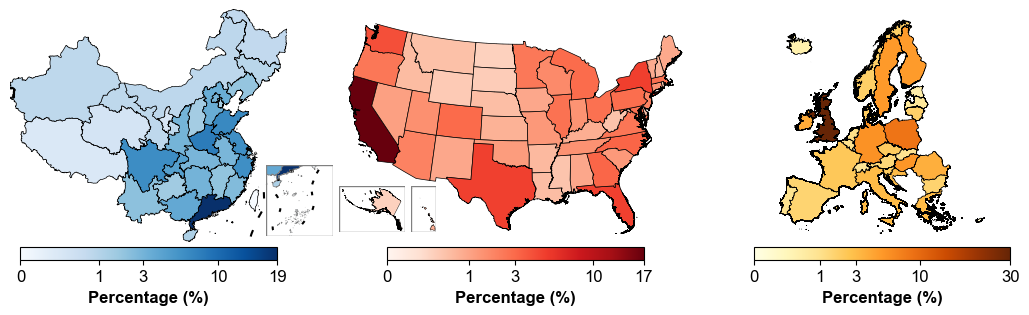

In [4]:
# Fig 1c

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
from matplotlib.colors import PowerNorm
from shapely.geometry import LineString, MultiLineString, GeometryCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'Arial',
    'axes.unicode_minus': False,
})

def extract_line_coords(geom):
    coords = []
    if isinstance(geom, LineString):
        coords.append(list(geom.coords))
    elif isinstance(geom, MultiLineString):
        for part in geom.geoms:
            coords.extend(extract_line_coords(part))
    elif isinstance(geom, GeometryCollection):
        for part in geom.geoms:
            coords.extend(extract_line_coords(part))
    return coords

# File paths
china_shp_path = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国省4326_4.shp'
usa_shp_path = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/usa/gadm41_USA_1.shp'
europe_shp_path = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/europe/Europe.shp'
china_nine_dash_path = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国十段4326.shp'

china_data = pd.read_csv('C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_1_c/china_regions_with_comment_count_attribute_table.csv')
usa_data = pd.read_csv('C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_1_c/usa_regions_with_comment_count_attribute_table.csv')
europe_data = pd.read_csv('C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_1_c/europe_regions_with_comment_count_attribute_table.csv')

china_merge_key = 'HASC_1'
usa_merge_key = 'HASC_1'
europe_merge_key = 'HASC_1'

# Projection definitions
albers_proj_china = "+proj=aea +lat_1=25 +lat_2=47 +lat_0=35 +lon_0=105 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"
albers_proj_usa = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
europe_proj = "+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs"

# Read and merge, then project
china_gdf = gpd.read_file(china_shp_path, engine="pyogrio").merge(china_data, on=china_merge_key).to_crs(albers_proj_china)
europe_gdf = gpd.read_file(europe_shp_path, engine="pyogrio").merge(europe_data, on=europe_merge_key).to_crs(europe_proj)

china_gdf['percentage'] = china_gdf['Num_review'] / china_gdf['Num_review'].sum()
europe_gdf['percentage'] = europe_gdf['Num_review'] / europe_gdf['Num_review'].sum()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3), gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0})
#fig.suptitle("(c) Spatial distribution of EV public charging station reviews", y=0.99, fontsize=14, fontweight='bold')

# Add sub-figure subtitles (positions may be tweaked for your figure size/layout)
#fig.text(0.17, 0.96, "China", ha='center', va='bottom', fontsize=13, fontweight='bold')
#fig.text(0.51, 0.96, "USA",   ha='center', va='bottom', fontsize=13, fontweight='bold')
#fig.text(0.85, 0.96, "Europe", ha='center', va='bottom', fontsize=13, fontweight='bold')

# ======= CHINA (Main and Inset — Albers) =======
mainland = china_gdf.cx[-2625769:2207315, -1900000:2186675]
vmax_china = mainland['percentage'].max()
norm_china = PowerNorm(gamma=0.4, vmin=0, vmax=vmax_china)

mainland.plot(
    column='percentage', ax=ax1, edgecolor='black', linewidth=0.5, cmap='Blues',
    legend=True, norm=norm_china,
    legend_kwds={
        'pad': 0.01, 'orientation': "horizontal", 'aspect': 20, 'shrink': 0.7,
        'ticks': [0, 0.01, 0.03, 0.1, vmax_china],
        'format': lambda x, _: f"{x * 100:.0f}" if x > 0 else "0",
        'label': 'Percentage (%)',
        'location': 'bottom'}
)
cbar_ax = ax1.get_figure().axes[-1]
cbar_ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')

if os.path.exists(china_nine_dash_path):
    dash_gdf = gpd.read_file(china_nine_dash_path, engine="pyogrio").to_crs(albers_proj_china)
    dash_gdf.plot(ax=ax1, color='black', linewidth=1.5)
ax1.set_xlim(-2625769, 2207315)
ax1.set_ylim(-1900000, 2186675)
ax1.set_axis_off()

# Inset for SCS islands -- ONLY the INSET gets the black box via spines; DO NOT add Rectangle to main map!
ax1_inset = inset_axes(ax1, width="25%", height="30%", loc='lower right',
                       bbox_to_anchor=(0.2, 0, 1, 1),
                       bbox_transform=ax1.transAxes)
islands = china_gdf.cx[200000:2200000, -3300000:-1200000]
islands.plot(
    column='percentage', ax=ax1_inset, edgecolor='gray', linewidth=0.5, cmap='Blues',
    legend=False, norm=norm_china
)
if os.path.exists(china_nine_dash_path):
    dash_gdf.plot(ax=ax1_inset, color='black', linewidth=1.5)

ax1_inset.set_xlim(200000, 2200000)
ymin = -1900000
ymin1 = ymin + 700000
ax1_inset.set_ylim(-3300000, ymin1)
ax1_inset.set_axis_off()

# Bounded box (matching Alaska/Hawaii style)
ax1_inset.add_patch(
    Rectangle((0, 0), 1, 1, transform=ax1_inset.transAxes,
              fill=False, edgecolor='gray', linewidth=1, zorder=100)
)
    
# ======= USA =======
us_shp = gpd.read_file(usa_shp_path, engine="pyogrio")
us_shp = us_shp.merge(usa_data, on=usa_merge_key).to_crs(albers_proj_usa)
us_total = us_shp['Num_review'].sum()
us_shp['percentage'] = us_shp['Num_review'] / us_total
alaska = us_shp[us_shp['HASC_1'] == 'US.AK']
hawaii = us_shp[us_shp['HASC_1'] == 'US.HI']
continental = us_shp[~us_shp['HASC_1'].isin(['US.AK', 'US.HI'])]
vmax_us = continental['percentage'].max()
norm_us = PowerNorm(gamma=0.4, vmin=0, vmax=vmax_us)
continental.plot(
    column='percentage', ax=ax2, cmap='Reds', edgecolor='black', linewidth=0.5,
    legend=True, norm=norm_us,
    legend_kwds={
        'pad': 0.01, 'orientation': "horizontal", 'aspect': 20, 'shrink': 0.7,
        'ticks': [0,0.01, 0.03, 0.1,vmax_us],
        'format': lambda x, _: f"{x * 100:.0f}" if x > 0 else "0",
        'label': 'Percentage (%)', 'location': 'bottom'
    })

cbar_ax = ax2.get_figure().axes[-1]
cbar_ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')

ax2.axis('off')
ax_ak = ax2.inset_axes([0.01, 0.05, 0.2, 0.2])
alaska.plot(column='percentage', ax=ax_ak, legend=False, cmap='Reds', edgecolor='black', linewidth=0.3, norm=norm_us)
ax_ak.axis('off')
ax_hi = ax2.inset_axes([0.15, 0.05, 0.2, 0.2])
hawaii.plot(column='percentage', ax=ax_hi, legend=False, cmap='Reds', edgecolor='black', linewidth=0.3, norm=norm_us)
ax_hi.axis('off')
for ax_inset in [ax_ak, ax_hi]:
    ax_inset.add_patch(Rectangle((0, 0), 1, 1, transform=ax_inset.transAxes, fill=False, edgecolor='gray', linewidth=1))

# ======= EUROPE =======
vmax_europe = europe_gdf['percentage'].max()
norm_europe = PowerNorm(gamma=0.4, vmin=0, vmax=vmax_europe)
europe_gdf.plot(
    column='percentage', ax=ax3, edgecolor='black', linewidth=0.5, cmap='YlOrBr',
    legend=True, norm=norm_europe,
    legend_kwds={
        'pad': 0.01, 'orientation': "horizontal", 'aspect': 20, 'shrink': 0.7,
        'ticks': [0, 0.01, 0.03, 0.1, vmax_europe],
        'format': lambda x, _: f"{x * 100:.0f}" if x > 0 else "0",
        'label': 'Percentage (%)', 'location': 'bottom'
    })

cbar_ax = ax3.get_figure().axes[-1]
cbar_ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')

ax3.axis('off')

plt.tight_layout(pad=0, w_pad=0)
plt.savefig("C:/Users/justi/Downloads/fig_1_c.png", dpi=300, bbox_inches='tight')
plt.show()

Plot saved to C:/Users/justi/Downloads/fig_2_a.png


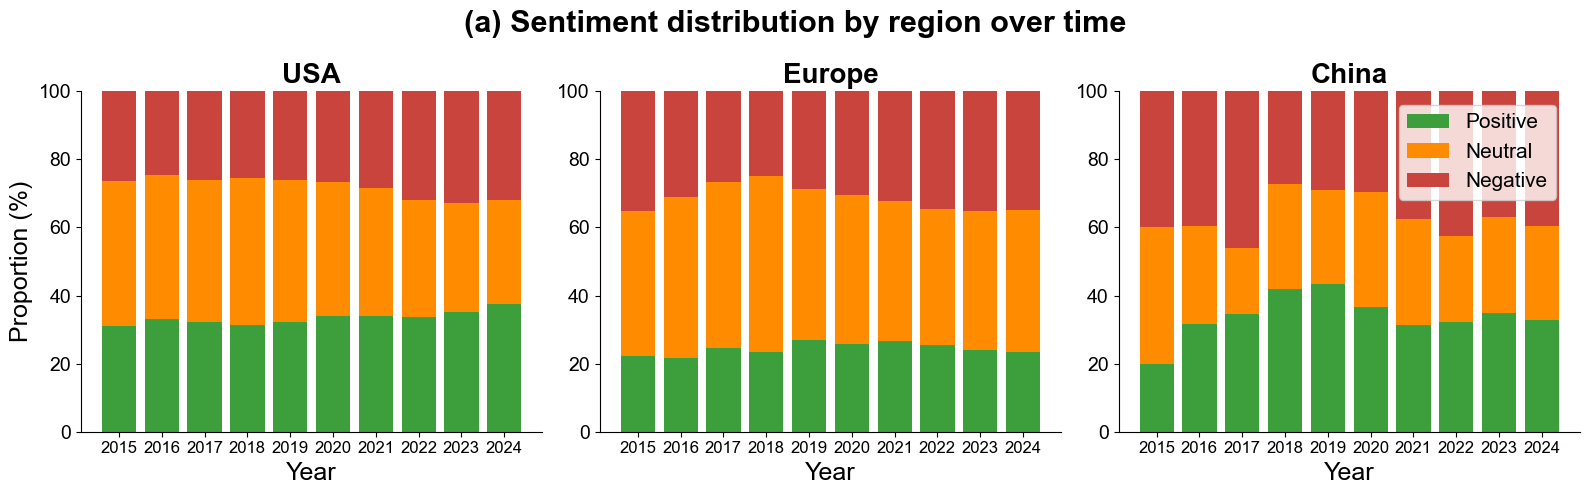

In [19]:
# Fig 2a

import json
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

# Global Style Settings: DO NOT set font.weight globally!
rcParams['font.family'] = 'Arial'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 16,
})

def load_sentiment_data(filepath):
    """Load processed sentiment data from JSON file"""
    with open(filepath, 'r', encoding='utf-8') as f:
        return json.load(f)

def plot_sentiment_stacked_bars(data, save_path=None):
    """Create a 100% stacked bar figure reflecting academic-style visuals—with only left and bottom spines"""
    regions = list(data.keys())
    n_regions = len(regions)
    colors = ['#3D9F3C', '#FF8C00', '#C9443D']  # Green, Yellow, Red
    labels = ['Positive', 'Neutral', 'Negative']

    fig, axs = plt.subplots(1, n_regions, figsize=(16, 5))
    if n_regions == 1:
        axs = [axs]
    for i, region in enumerate(regions):
        ax = axs[i]
        region_data = data[region]
        years = region_data['years']
        positive = region_data['percentages']['positive']
        neutral = region_data['percentages']['neutral']
        negative = region_data['percentages']['negative']

        # 100% stacked bar (bottom positions)
        ax.bar(years, positive, color=colors[0], width=0.8, label=labels[0])
        ax.bar(years, neutral, bottom=positive, color=colors[1], width=0.8, label=labels[1])
        ax.bar(
            years, negative,
            bottom=[p+n for p, n in zip(positive, neutral)],
            color=colors[2], width=0.8, label=labels[2]
        )
        ax.set_title(region, fontsize=20, fontweight='bold')
        ax.set_xlabel('Year', fontsize=18)
        ax.set_ylabel('Proportion (%)' if i == 0 else '', fontsize=18)
        ax.set_xticks(years)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='x', rotation=0, labelsize=12)
        ax.tick_params(axis='y', labelsize=14)

        # Show only left and bottom spines (bounds)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)

        # Legend only on upper-right corner of rightmost subplot
        if i == n_regions - 1:
            ax.legend(
                loc='upper right',
                fontsize=15,
                bbox_to_anchor=(0.97, 0.99), 
                frameon=True
            )
        else:
            ax.legend().set_visible(False)

    fig.suptitle('(a) Sentiment distribution by region over time', fontsize=22, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.99])

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    plt.show()

# Main Execution
if __name__ == "__main__":
    data = load_sentiment_data('C:/Users/justi/Downloads/LLM_bert_comment_code/LLM_bert_comment_code/data/fig_2_a.json')
    plot_sentiment_stacked_bars(
        data,
        save_path='C:/Users/justi/Downloads/fig_2_a.png'
    )


C:\Users\justi\AppData\Local\Temp\ipykernel_4372\635940954.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.06, 1, 1])


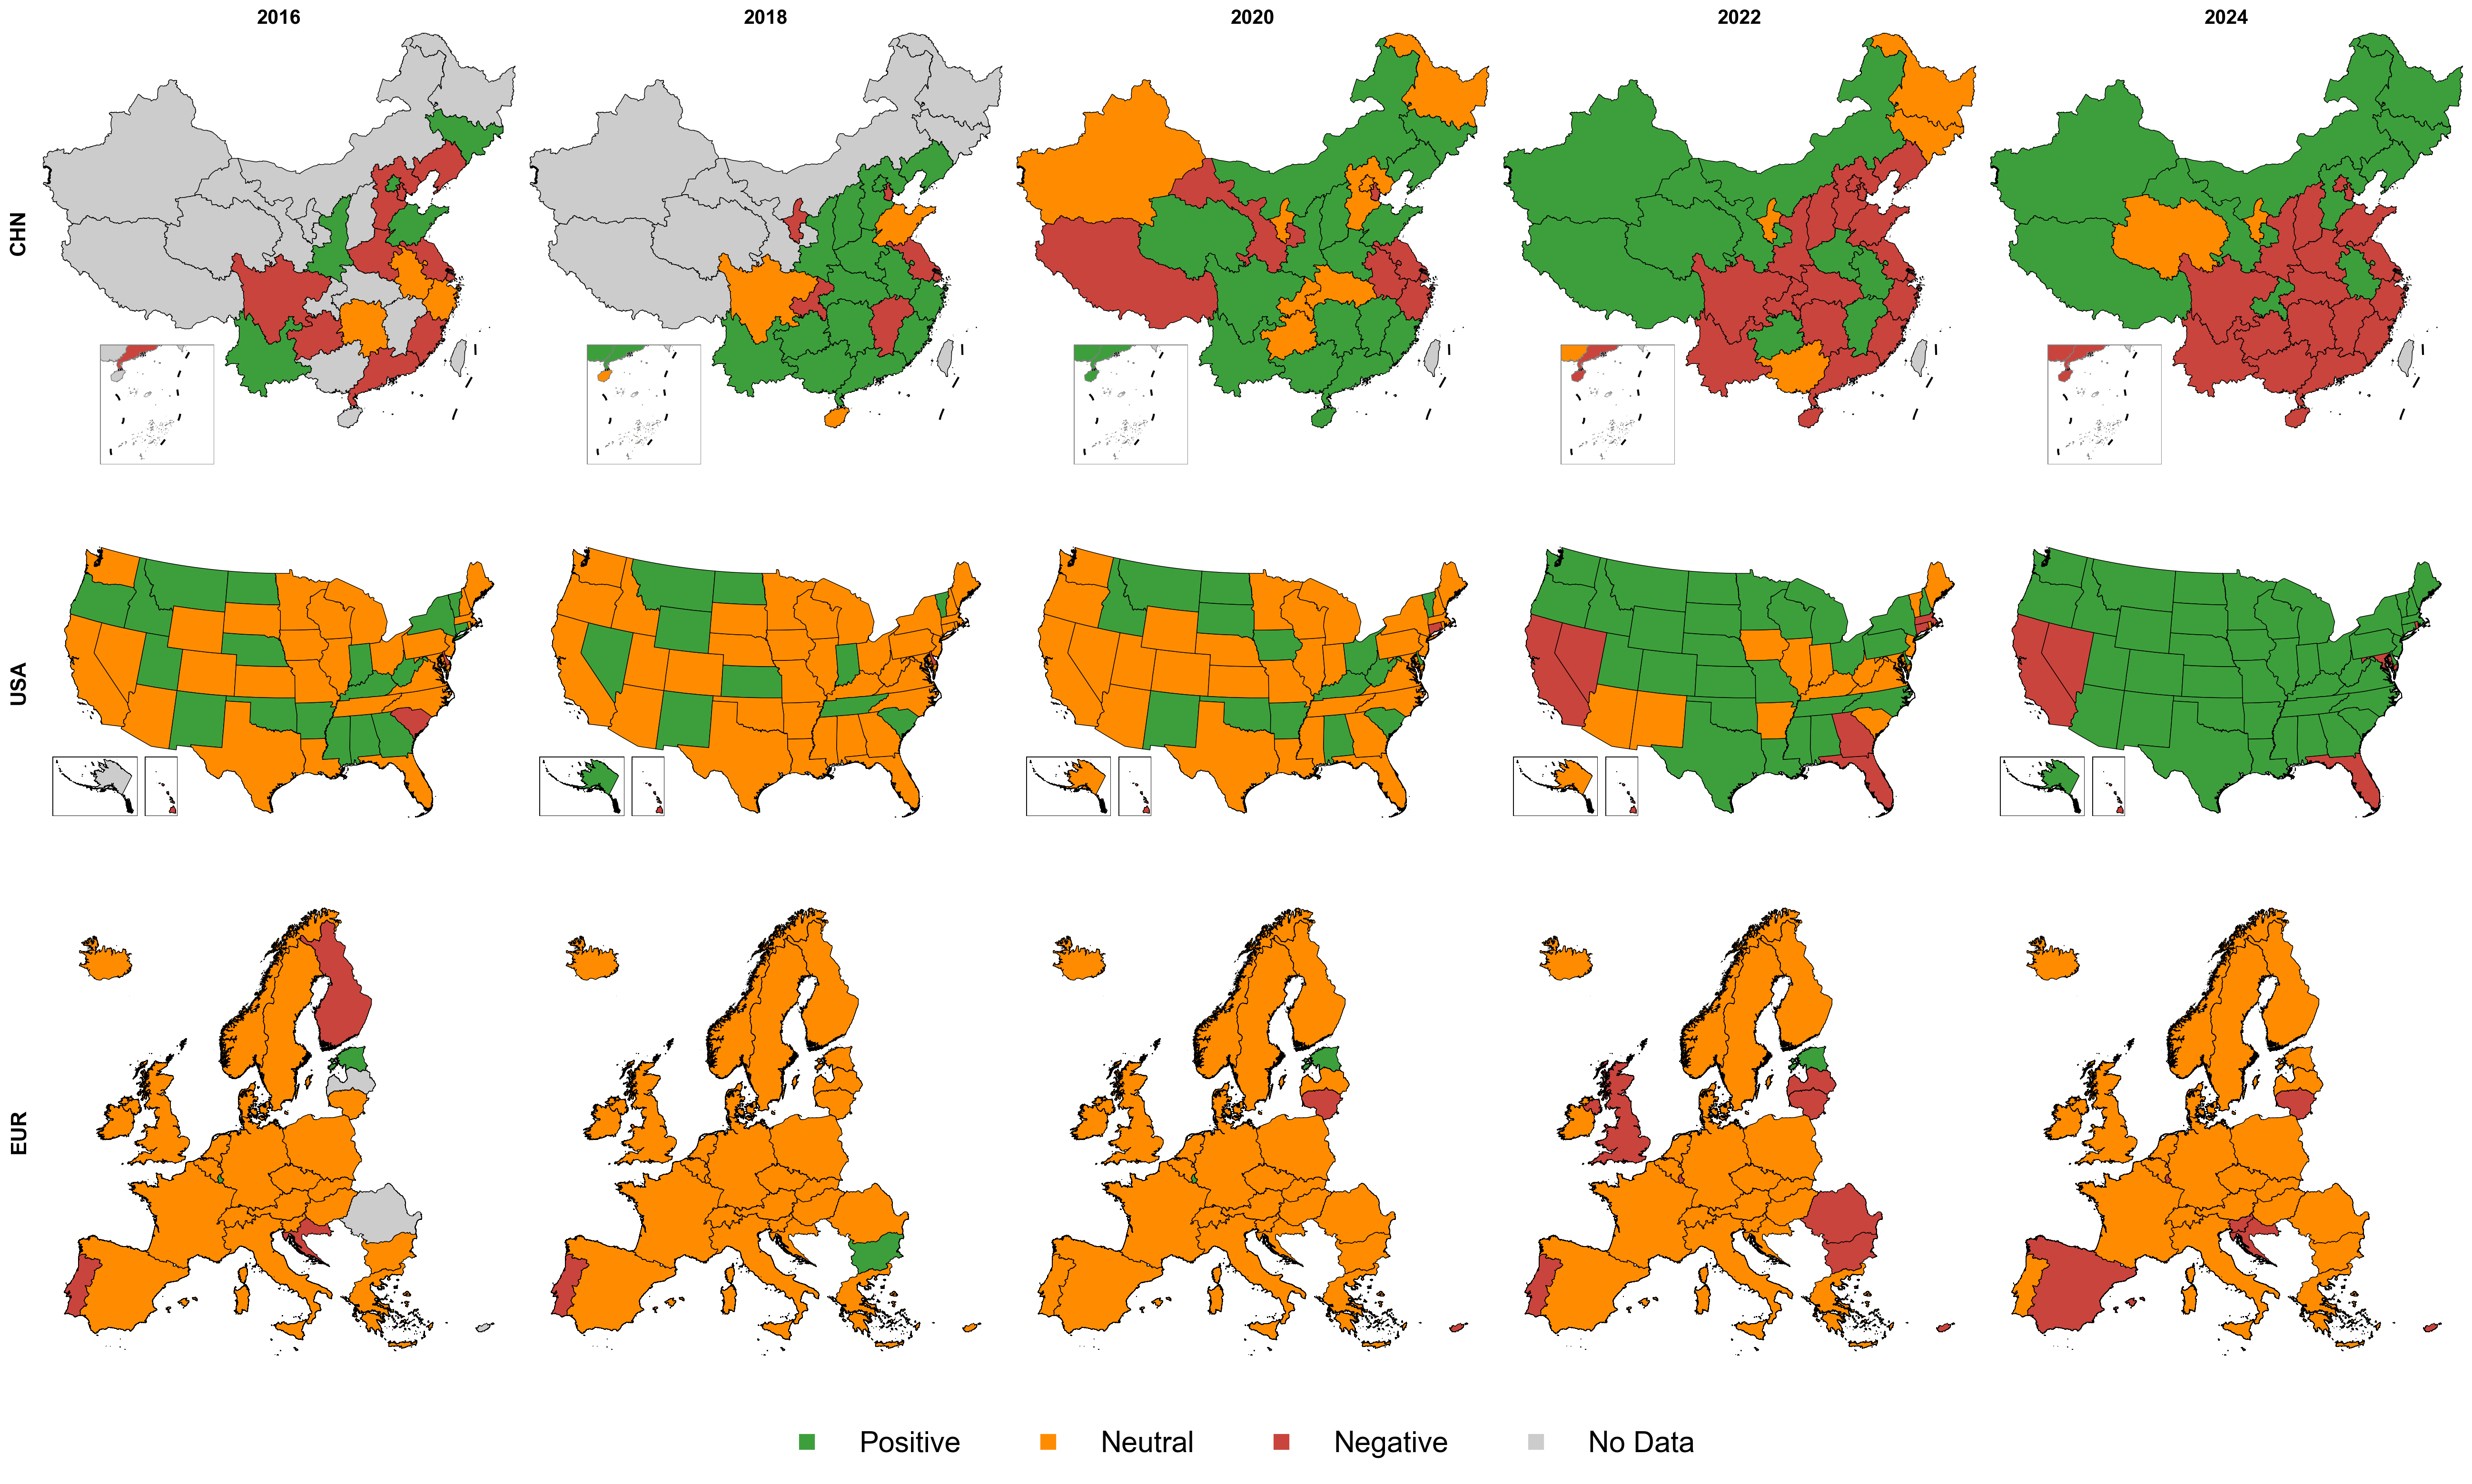

In [6]:
# Fig 2b

import os
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

sent_colors = {
    'positive': '#3D9F3C',
    'neutral':  '#FF8C00',
    'negative': '#C9443D',
    'no_data':  '#CCCCCC'
}
categories = ['positive', 'neutral', 'negative', 'no_data']
cmap = ListedColormap([sent_colors[k] for k in categories])

# File paths
CHINA_SHP_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国省4326_4.shp'
USA_SHP_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/usa/gadm41_USA_1.shp'
EUR_SHP_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/europe/Europe.shp'
CHINA_JSON_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM_TianDiTU_Province.json'
CHINA_NINE_DASH_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国十段4326.shp'

# Projection definitions
albers_proj_china = "+proj=aea +lat_1=25 +lat_2=47 +lat_0=35 +lon_0=105 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"
albers_proj_usa = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
europe_proj = "+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs"

REGION_CONFIG = {
    'CHN': {
        'csv_folder': "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_2_b/china/Overall_sentiment",
        'shp_path': CHINA_SHP_PATH,
        'hasc_col': 'HASC_1',
        'name_col': 'name'
    },
    'USA': {
        'csv_folder': "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_2_b/usa/Overall_sentiment",
        'shp_path': USA_SHP_PATH,
        'hasc_col': 'HASC_1'
    },
    'EUR': {
        'csv_folder': "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_2_b/europe/Overall_sentiment",
        'shp_path': EUR_SHP_PATH,
        'hasc_col': 'HASC_1'
    }
}

def load_china_hasc_mapping(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        return {v: k for k, v in json.load(f).items()}

def prepare_region_data(year, region_info):
    csv_path = os.path.join(region_info['csv_folder'], f"sentiment_stats_{year}_Overall_sentiment.csv")
    if not os.path.exists(csv_path):
        return None
    df = pd.read_csv(csv_path)
    if not os.path.exists(region_info['shp_path']):
        return None
    try:
        gdf = gpd.read_file(region_info['shp_path'], engine='pyogrio')
    except Exception:
        gdf = gpd.read_file(region_info['shp_path'])
    if region_info.get('name_col'):
        china_mapping = load_china_hasc_mapping(CHINA_JSON_PATH)
        gdf['HASC_1'] = gdf[region_info['name_col']].map(china_mapping)
    merged = gdf.merge(df, on='HASC_1', how='left')
    merged['final_sent'] = merged['final_sentiment'].fillna('no_data')
    # Project to correct CRS
    if region_info['shp_path'] == CHINA_SHP_PATH:
        merged = merged.to_crs(albers_proj_china)
    elif region_info['shp_path'] == USA_SHP_PATH:
        merged = merged.to_crs(albers_proj_usa)
    elif region_info['shp_path'] == EUR_SHP_PATH:
        merged = merged.to_crs(europe_proj)
    merged['final_sent'] = pd.Categorical(merged['final_sent'], categories=categories, ordered=True)
    merged['color'] = merged['final_sent'].map(sent_colors).fillna(sent_colors['no_data'])
    return merged

years = [2016, 2018, 2020, 2022, 2024]
regions = list(REGION_CONFIG.keys())
fig, axs = plt.subplots(len(regions), len(years), figsize=(26, 16), dpi=200)

for row_idx, region in enumerate(regions):
    region_info = REGION_CONFIG[region]
    for col_idx, year in enumerate(years):
        ax = axs[row_idx, col_idx]
        merged = prepare_region_data(year, region_info)
        if merged is None:
            ax.axis('off')
            continue

        if region == 'USA':
            alaska = merged[merged['HASC_1'] == 'US.AK']
            hawaii = merged[merged['HASC_1'] == 'US.HI']
            mainland = merged[~merged['HASC_1'].isin(['US.AK', 'US.HI'])]
            mainland.plot(ax=ax, color=mainland['color'], edgecolor='black', linewidth=0.5)
            ax.set_axis_off()
            # Alaska inset with frame
            ax_ak = ax.inset_axes([0.01, 0.05, 0.2, 0.2])
            alaska.plot(ax=ax_ak, color=alaska['color'], edgecolor='black', linewidth=0.5)
            ax_ak.set_axis_off()
            ax_ak.add_patch(Rectangle((0, 0), 1, 1, transform=ax_ak.transAxes,
                                      fill=False, edgecolor='black', linewidth=1, zorder=100))
            # Hawaii inset with frame
            ax_hi = ax.inset_axes([0.15, 0.05, 0.2, 0.2])
            hawaii.plot(ax=ax_hi, color=hawaii['color'], edgecolor='black', linewidth=0.5)
            ax_hi.set_axis_off()
            ax_hi.add_patch(Rectangle((0, 0), 1, 1, transform=ax_hi.transAxes,
                                      fill=False, edgecolor='black', linewidth=1, zorder=100))

        elif region == 'CHN':
            xmin, xmax = -2625769, 2207315
            ymin, ymax = -1900000, 2186675
            mainland = merged.cx[xmin:xmax, ymin:ymax]
            mainland.plot(ax=ax, color=mainland['color'], edgecolor='black', linewidth=0.5)
            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)
            ax.set_axis_off()
            # Nine-dash line overlay
            if os.path.exists(CHINA_NINE_DASH_PATH):
                dash_gdf = gpd.read_file(CHINA_NINE_DASH_PATH, engine="pyogrio").to_crs(albers_proj_china)
                dash_gdf.plot(ax=ax, color='black', linewidth=1.5)
            # South China Sea inset with gray frame
            ax_inset = inset_axes(ax, width="25%", height="30%", loc='lower left',
                                  bbox_to_anchor=(0.1, -0.1, 1, 1), bbox_transform=ax.transAxes)
            scs_xmin, scs_xmax = 200000, 2200000
            scs_ymin, scs_ymax = -3300000, -1200000
            islands = merged.cx[scs_xmin:scs_xmax, scs_ymin:scs_ymax]
            islands.plot(ax=ax_inset, color=islands['color'], edgecolor='gray', linewidth=0.5)
            if os.path.exists(CHINA_NINE_DASH_PATH):
                dash_gdf.plot(ax=ax_inset, color='black', linewidth=1.5)
            ax_inset.set_xlim(scs_xmin, scs_xmax)
            ymin1 = -1900000 + 700000
            ax_inset.set_ylim(-3300000, ymin1)
            ax_inset.set_axis_off()
            ax_inset.add_patch(
                Rectangle((0, 0), 1, 1, transform=ax_inset.transAxes,
                          fill=False, edgecolor='gray', linewidth=1, zorder=100)
            )

        elif region == 'EUR':
            merged.plot(ax=ax, color=merged['color'], edgecolor='black', linewidth=0.5)
            ax.set_axis_off()

        # Titles and side region label
        if row_idx == 0:
            ax.set_title(str(year), fontsize=15, fontweight='bold', pad=7)
        if col_idx == 0:
            ax.annotate(region, xy=(-0.05, 0.5), xycoords='axes fraction', rotation=90,
                        va='center', ha='center', fontsize=16, fontweight='bold')

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label=label.title(),
           markerfacecolor=sent_colors[label], markersize=13)
    for label in ['positive', 'neutral', 'negative']
] + [
    Line2D([0], [0], marker='s', color='w', label='No Data',
           markerfacecolor=sent_colors['no_data'], markersize=13)
]
fig.legend(
    handles=legend_elements, loc='lower center', ncol=4,
    fontsize=22, frameon=False
)

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.savefig("C:/Users/justi/Downloads/fig_2_b.png", dpi=300, bbox_inches='tight')
plt.show()

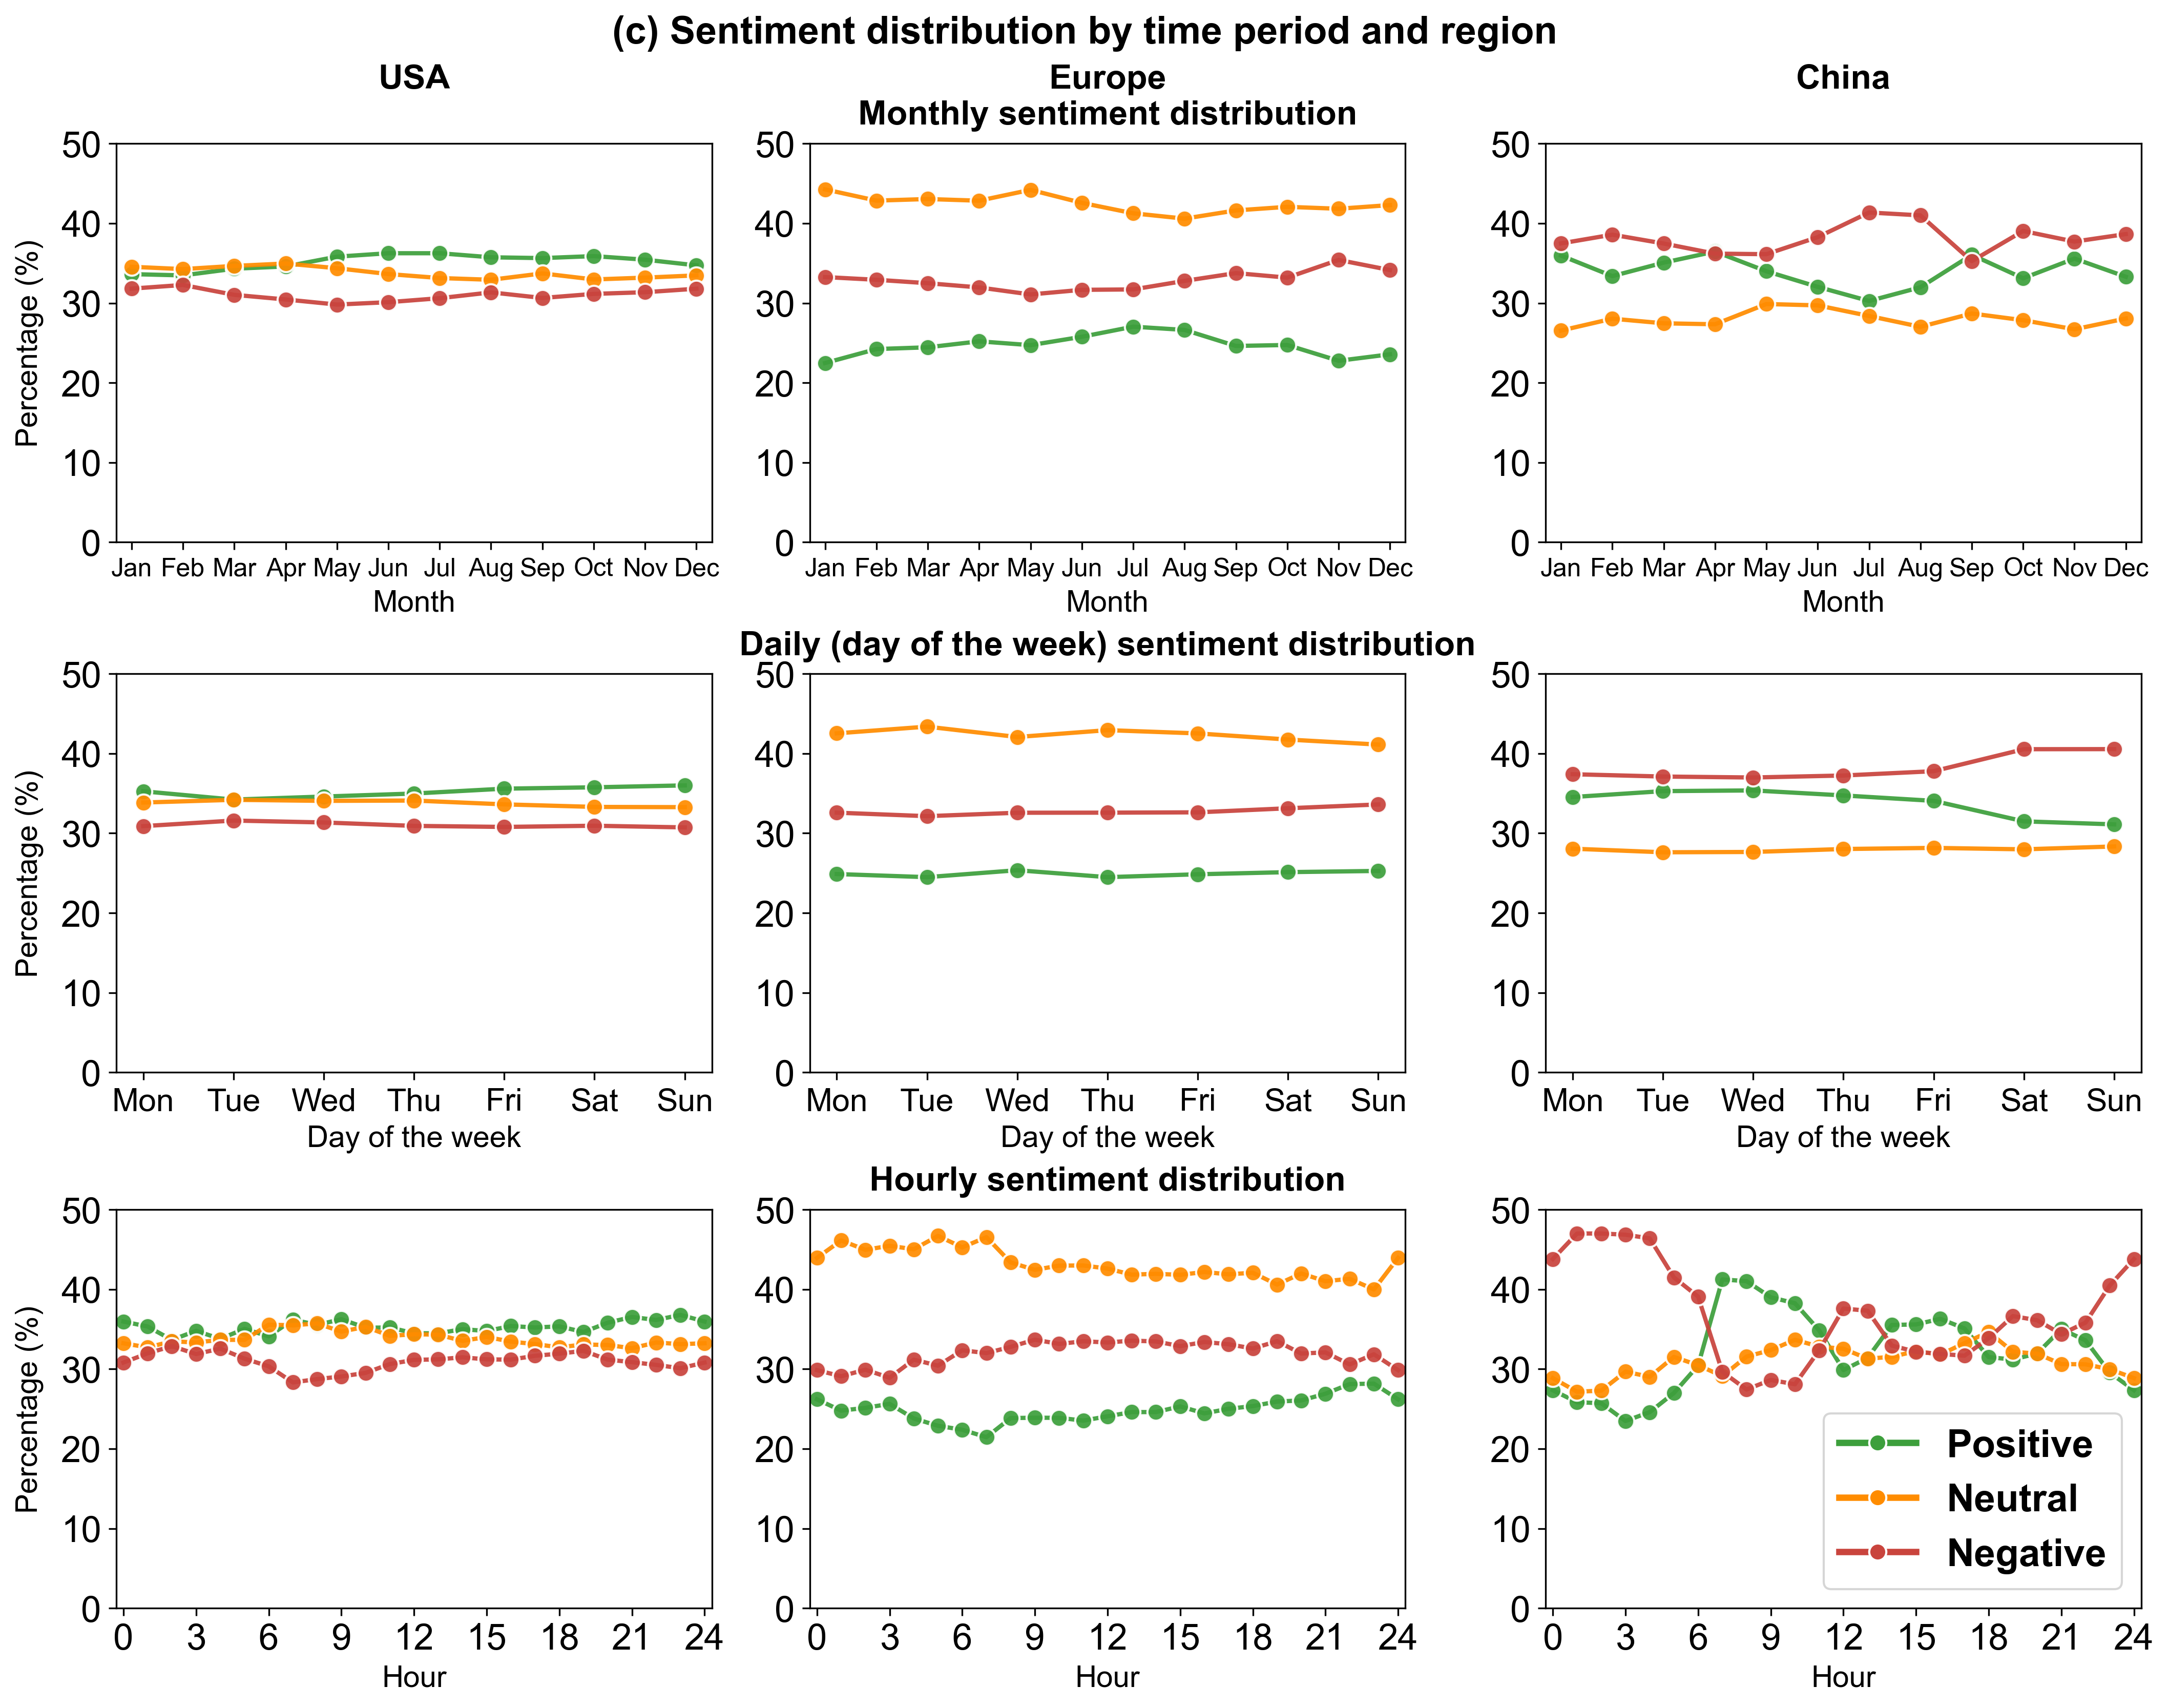

In [3]:
# Fig 2c

import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

# ----------- Font size settings for easy adjustment -----------
font_main_title = 18
font_region_title = 16
font_time_sub = 16
font_label = 14
font_tick_monthly = 12   # Font size for monthly x-axis
font_tick_weekly = 15    # Font size for weekly ("daily") x-axis
font_tick_hourly = 17    # Font size for hourly x-axis
font_tick_y = 17         # Font size for y-axis tick labels (make this bigger as needed)
font_legend = 18

matplotlib.rcParams['font.family'] = 'Arial'

# ----------- Load data -----------
with open('C:/Users/justi/Downloads//LLM_bert_comment_code_v2/data/fig_2_c.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

colors = {
    'Positive': '#3D9F3C',  # Green
    'Neutral': '#FF8C00',   # Orange
    'Negative': '#C9443D'   # Red
}

def create_custom_legend(ax):
    legend_elements = [
        Line2D([0], [0], color=colors['Positive'], lw=3, marker='o', markersize=8, 
               markerfacecolor=colors['Positive'], markeredgecolor='white', markeredgewidth=1, label='Positive'),
        Line2D([0], [0], color=colors['Neutral'], lw=3, marker='o', markersize=8, 
               markerfacecolor=colors['Neutral'], markeredgecolor='white', markeredgewidth=1, label='Neutral'),
        Line2D([0], [0], color=colors['Negative'], lw=3, marker='o', markersize=8, 
               markerfacecolor=colors['Negative'], markeredgecolor='white', markeredgewidth=1, label='Negative'),
    ]
    ax.legend(handles=legend_elements, framealpha=0.8, loc='lower right', prop={'weight': 'bold', 'size': font_legend})

def plot_combined_time_distribution(data):
    time_keys = [
        # (key, labels, subtitle, x_min, x_max)
        ('monthly', 
         ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
         'Monthly sentiment distribution', 1, 12),
        ('weekly', 
         ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
         'Daily (day of the week) sentiment distribution', 0, 6),
        ('hourly', 
         list(range(25)),  # For tick labeling with pure hour values
         'Hourly sentiment distribution', 0, 24)
    ]
    regions = ['USA', 'Europe', 'China']

    fig, axs = plt.subplots(3, 3, figsize=(14, 11), dpi=300, constrained_layout=True)
    fig.suptitle('(c) Sentiment distribution by time period and region', 
                 fontsize=font_main_title, weight='bold')
    y_min, y_max = 0, 50
    x_margin = 0.3  # add margin for x-axis limits

    # ----------- Titles ----------
    for idx, region in enumerate(regions):
        axs[0, idx].set_title(region, fontsize=font_region_title, weight='bold', pad=26)
    for row_idx, (_, _, row_title, _, _) in enumerate(time_keys):
        axs[row_idx, 1].annotate(
            row_title, xy=(0.5, 1.07), xycoords='axes fraction',
            ha='center', va='center', fontsize=font_time_sub, weight='bold'
        )

    # ----------- Plotting Loop ----------
    for row_idx, (time_key, time_labels, _, x_min, x_max) in enumerate(time_keys):
        for col_idx, region in enumerate(regions):
            ax = axs[row_idx, col_idx]
            region_data = data[region][f'{time_key}_percentage']
            if time_key == 'hourly':
                # Create 25 hourly points, pad last with first to "close" the curve
                time_points = list(range(25))
                percentages = {}
                for sentiment in ['Positive', 'Neutral', 'Negative']:
                    y_vals = [region_data.get(str(h), {sentiment: 0})[sentiment] for h in range(24)]
                    y_plot = y_vals + [y_vals[0]] if len(y_vals) == 24 else y_vals
                    percentages[sentiment] = y_plot
                # Ticks only at every 3 hours, labeled 0, 3, 6,...24 (no minute text)
                xticks = list(range(0, 25, 3))
                xticklabels = [str(t) for t in xticks]  # Labels are just hour numbers
                ax.set_xticks(xticks)
                ax.set_xticklabels(xticklabels, fontsize=font_tick_hourly, rotation=0)
                ax.set_xlim(x_min - x_margin, x_max + x_margin)
            elif time_key == 'monthly':
                time_points = sorted([int(k) for k in region_data.keys()])
                xticks = list(range(x_min, x_max + 1))
                xticklabels = [time_labels[t - 1] for t in xticks]
                percentages = {
                    'Positive': [region_data[str(t)]['Positive'] for t in time_points],
                    'Neutral': [region_data[str(t)]['Neutral'] for t in time_points],
                    'Negative': [region_data[str(t)]['Negative'] for t in time_points]
                }
                ax.set_xticks(xticks)
                ax.set_xticklabels(xticklabels, fontsize=font_tick_monthly, rotation=0)
                ax.set_xlim(x_min - x_margin, x_max + x_margin)
            else:  # weekly
                time_points = sorted([int(k) for k in region_data.keys()])
                xticks = list(range(x_min, x_max + 1))
                xticklabels = [time_labels[t] for t in xticks]
                percentages = {
                    'Positive': [region_data[str(t)]['Positive'] for t in time_points],
                    'Neutral': [region_data[str(t)]['Neutral'] for t in time_points],
                    'Negative': [region_data[str(t)]['Negative'] for t in time_points]
                }
                ax.set_xticks(xticks)
                ax.set_xticklabels(xticklabels, fontsize=font_tick_weekly, rotation=0)
                ax.set_xlim(x_min - x_margin, x_max + x_margin)
            ax.set_ylim(y_min, y_max)

            # ----------- Make y-axis values bigger -----------
            ax.tick_params(axis='y', labelsize=font_tick_y)

            # ----------- Draw curves ----------
            for sentiment in ['Positive', 'Neutral', 'Negative']:
                ax.plot(
                    time_points,
                    percentages[sentiment],
                    color=colors[sentiment],
                    marker='o',
                    linestyle='-',
                    linewidth=2,
                    markersize=8,
                    markerfacecolor=colors[sentiment],
                    markeredgecolor='white',
                    markeredgewidth=1,
                    alpha=0.93,
                )
            if col_idx == 0:
                ax.set_ylabel('Percentage (%)', labelpad=8, fontsize=font_label)
            else:
                ax.set_ylabel('')
            # x-axis labe
            if time_key == 'weekly':
                ax.set_xlabel('Day of the week', fontsize=font_label)
            elif time_key == 'monthly':
                ax.set_xlabel('Month', fontsize=font_label)
            elif time_key == 'hourly':
                ax.set_xlabel('Hour', fontsize=font_label)
            else:
                ax.set_xlabel(time_key.capitalize(), fontsize=font_label)

            if row_idx == 2 and col_idx == 2:
                create_custom_legend(ax)

    plt.savefig(
        'C:/Users/justi/Downloads/fig_2_c.png',
        dpi=300, bbox_inches='tight'
    )
    plt.show()

plot_combined_time_distribution(data)

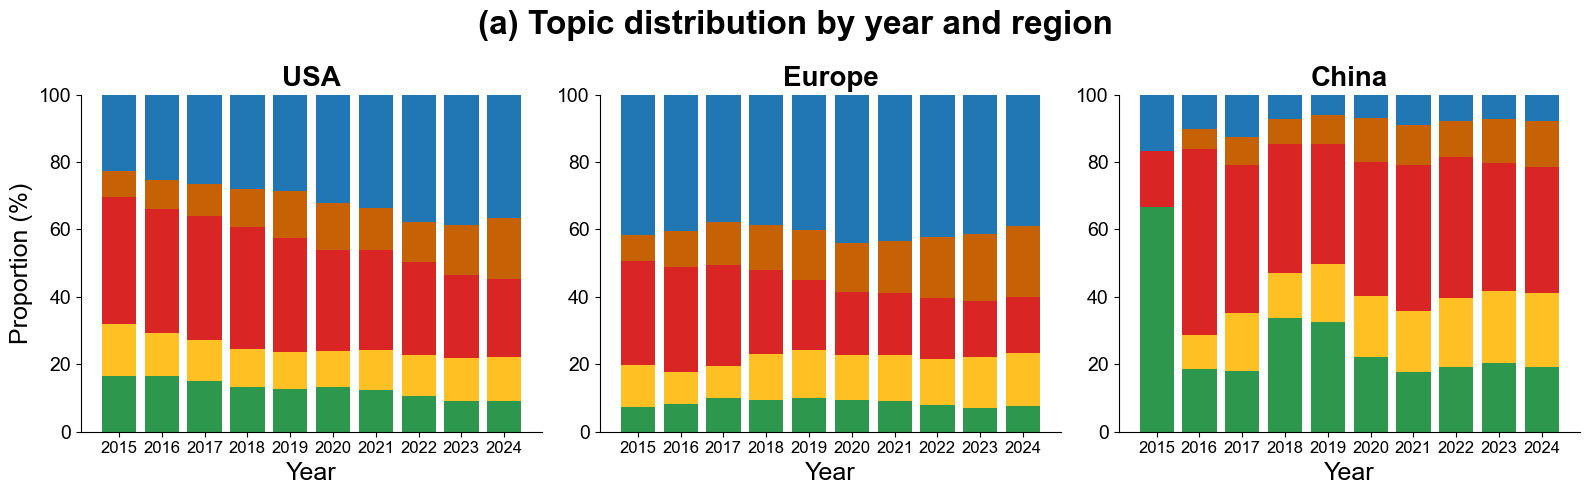

In [5]:
# Fig 3a

import matplotlib.pyplot as plt
import numpy as np
import os
import csv
from matplotlib import rcParams

# --- Style and Font: match previous code ---
rcParams['font.family'] = 'Arial'
rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
})

theme_colors = {
    'Environment_and_Service_Experience': '#2E974E',
    'Pricing_and_Payment': '#FFC023',
    'Location_and_Availability': '#D92523',
    'Charging_Performance': '#C66205',
    'Charging_Functionality_and_Reliability': '#2077B4',
}
themes = list(theme_colors.keys())
colors = list(theme_colors.values())

def calculate_topic_percentages(folder_path):
    yearly_data = {}
    for filename in os.listdir(folder_path):
        if filename.startswith('sentiment_summary_2015-2024_') and filename.endswith('.csv'):
            if 'Overall_sentiment' in filename:
                continue
            topic = filename[len('sentiment_summary_2015-2024_'):-4]
            if topic not in themes:
                continue
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8-sig') as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    try:
                        year = int(row['Year'])
                        total = int(row['Total'])
                        if year not in yearly_data:
                            yearly_data[year] = {}
                        yearly_data[year][topic] = total
                    except (ValueError, KeyError):
                        continue
    years = list(range(2015, 2025))
    data_matrix = np.zeros((len(themes), len(years)))
    for i, theme in enumerate(themes):
        for j, year in enumerate(years):
            data_matrix[i, j] = yearly_data.get(year, {}).get(theme, 0)
    yearly_totals = np.sum(data_matrix, axis=0)
    # Avoid division by zero if an entire year is missing:
    yearly_totals[yearly_totals == 0] = 1
    percentage_data = (data_matrix / yearly_totals) * 100
    return percentage_data

folder_paths = [
    'C:/Users/justi/Downloads/LLM_bert_comment_code/LLM_bert_comment_code/data/fig_3_a/usa/statistic', 
    'C:/Users/justi/Downloads/LLM_bert_comment_code/LLM_bert_comment_code/data/fig_3_a/europe/statistic',
    'C:/Users/justi/Downloads/LLM_bert_comment_code/LLM_bert_comment_code/data/fig_3_a/china/statistic'
]
data1 = calculate_topic_percentages(folder_paths[0])
data2 = calculate_topic_percentages(folder_paths[1])
data3 = calculate_topic_percentages(folder_paths[2])

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

def plot_stacked_bar(ax, data, title):
    years_range = np.arange(2015, 2025)
    x_pos = np.arange(len(years_range))
    bar_width = 0.8
    bottom = np.zeros(len(years_range))
    for i, theme in enumerate(themes):
        plot_data = data[i] if len(data[i]) == len(years_range) else np.zeros(len(years_range))
        ax.bar(x_pos, plot_data, bottom=bottom, color=colors[i],
               width=bar_width, edgecolor='none', label=theme.replace('_', ' '))
        bottom += plot_data
    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel('Year', fontsize=18)
    # Only first subplot gets y label:
    ax.set_ylabel('Proportion (%)' if title == "USA" else '', fontsize=18)
    ax.set_xticks(x_pos)
    ax.set_xticklabels([str(y) for y in years_range], fontsize=14, rotation=0)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=12)
    #ax.grid(axis='y', linestyle='--', alpha=0.3)
    # Show only left and bottom spines (bounds):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    # Hide legend on subplots:
    ax.legend().set_visible(False)

plot_stacked_bar(axs[0], data1, "USA")
plot_stacked_bar(axs[1], data2, "Europe")
plot_stacked_bar(axs[2], data3, "China")

fig.suptitle('(a) Topic distribution by year and region', fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.99])

# If you want an overall legend (optional, matches style):
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=len(themes), fontsize=13, frameon=False)

plt.savefig('C:/Users/justi/Downloads/fig_3_a.png', dpi=300, bbox_inches='tight')
plt.show()


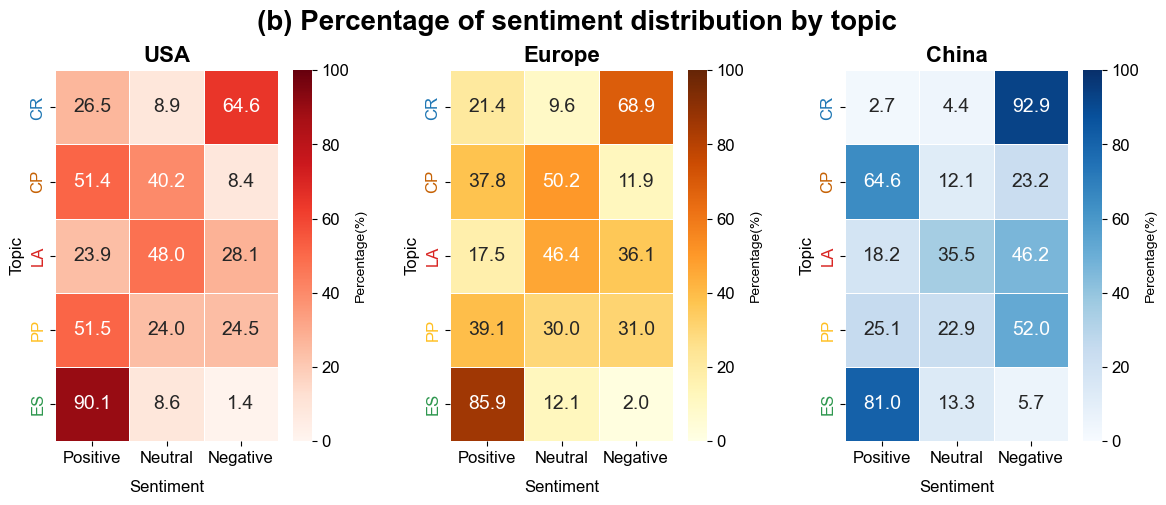

In [6]:
# Fig 3b

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams
import json

# Set global font to Times New Roman
plt.rcParams.update({
    'font.family': 'Arial',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 12,
})

# Theme colors
theme_colors = {
    'ES': '#2E974E',
    'PP': '#FFC023',
    'LA': '#D92523',
    'CP': '#C66205',
    'CR': '#2077B4'
}

with open('C:/Users/justi/Downloads/LLM_bert_comment_code/LLM_bert_comment_code/data/fig_3_b.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# USA data and heatmap (first position)
usa_df = pd.DataFrame(data['usa_data'])
usa_pivot = usa_df.set_index('Theme')
sns.heatmap(
    usa_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap='Reds',
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={'label': 'Percentage(%)', 'ticks': range(0, 101, 20)},
    square=True,
    ax=axes[0],
    annot_kws={'size': 14}
)
axes[0].set_title('USA', fontweight='bold', fontsize=16)
axes[0].set_xticklabels(["Positive", "Neutral", "Negative"])
axes[0].xaxis.tick_bottom()
axes[0].xaxis.set_label_position('bottom')
axes[0].set_xlabel('Sentiment', fontsize=12, labelpad=10)
axes[0].set_ylabel('Topic', fontsize=12)
axes[0].collections[0].set_clim(0, 100)
cbar = axes[0].collections[0].colorbar
cbar.set_label('Percentage(%)')

# Set y-tick label colors for USA
for label in axes[0].get_yticklabels():
    theme = label.get_text()
    label.set_color(theme_colors.get(theme, 'black'))  # default to black if theme not found

# Europe data and heatmap (second position)
europe_df = pd.DataFrame(data['europe_data'])
europe_pivot = europe_df.set_index('Theme')
sns.heatmap(
    europe_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap='YlOrBr',
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={'label': 'Percentage(%)', 'ticks': range(0, 101, 20)},
    square=True,
    ax=axes[1],
    annot_kws={'size': 14}
)
axes[1].set_title('Europe', fontweight='bold', fontsize=16)
axes[1].set_xticklabels(["Positive", "Neutral", "Negative"])
axes[1].xaxis.tick_bottom()
axes[1].xaxis.set_label_position('bottom')
axes[1].set_xlabel('Sentiment', fontsize=12, labelpad=10)
axes[1].set_ylabel('Topic', fontsize=12)
axes[1].collections[0].set_clim(0, 100)
cbar = axes[1].collections[0].colorbar
cbar.set_label('Percentage(%)')

# Set y-tick label colors for Europe
for label in axes[1].get_yticklabels():
    theme = label.get_text()
    label.set_color(theme_colors.get(theme, 'black'))  # default to black if theme not found

# China data and heatmap (third position)
china_df = pd.DataFrame(data['china_data'])
china_pivot = china_df.set_index('Theme')
sns.heatmap(
    china_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap='Blues',
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={'label': 'Percentage(%)', 'ticks': range(0, 101, 20)},
    square=True,
    ax=axes[2],
    annot_kws={'size': 14}
)
axes[2].set_title('China', fontweight='bold', fontsize=16)
axes[2].set_xticklabels(["Positive", "Neutral", "Negative"])
axes[2].xaxis.tick_bottom()
axes[2].xaxis.set_label_position('bottom')
axes[2].set_xlabel('Sentiment', fontsize=12, labelpad=10)
axes[2].set_ylabel('Topic', fontsize=12)
axes[2].collections[0].set_clim(0, 100)
cbar = axes[2].collections[0].colorbar
cbar.set_label('Percentage(%)')

fig.suptitle('(b) Percentage of sentiment distribution by topic', fontsize=20, fontweight='bold')
#plt.tight_layout(rect=[0, 0, 1, 0.99])

# Set y-tick label colors for China
for label in axes[2].get_yticklabels():
    theme = label.get_text()
    label.set_color(theme_colors.get(theme, 'black'))  # default to black if theme not found

# Adjust layout and save
plt.tight_layout()
plt.savefig('C:/Users/justi/Downloads/fig_3_b.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_4372\3343621754.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.06, 1, 1])


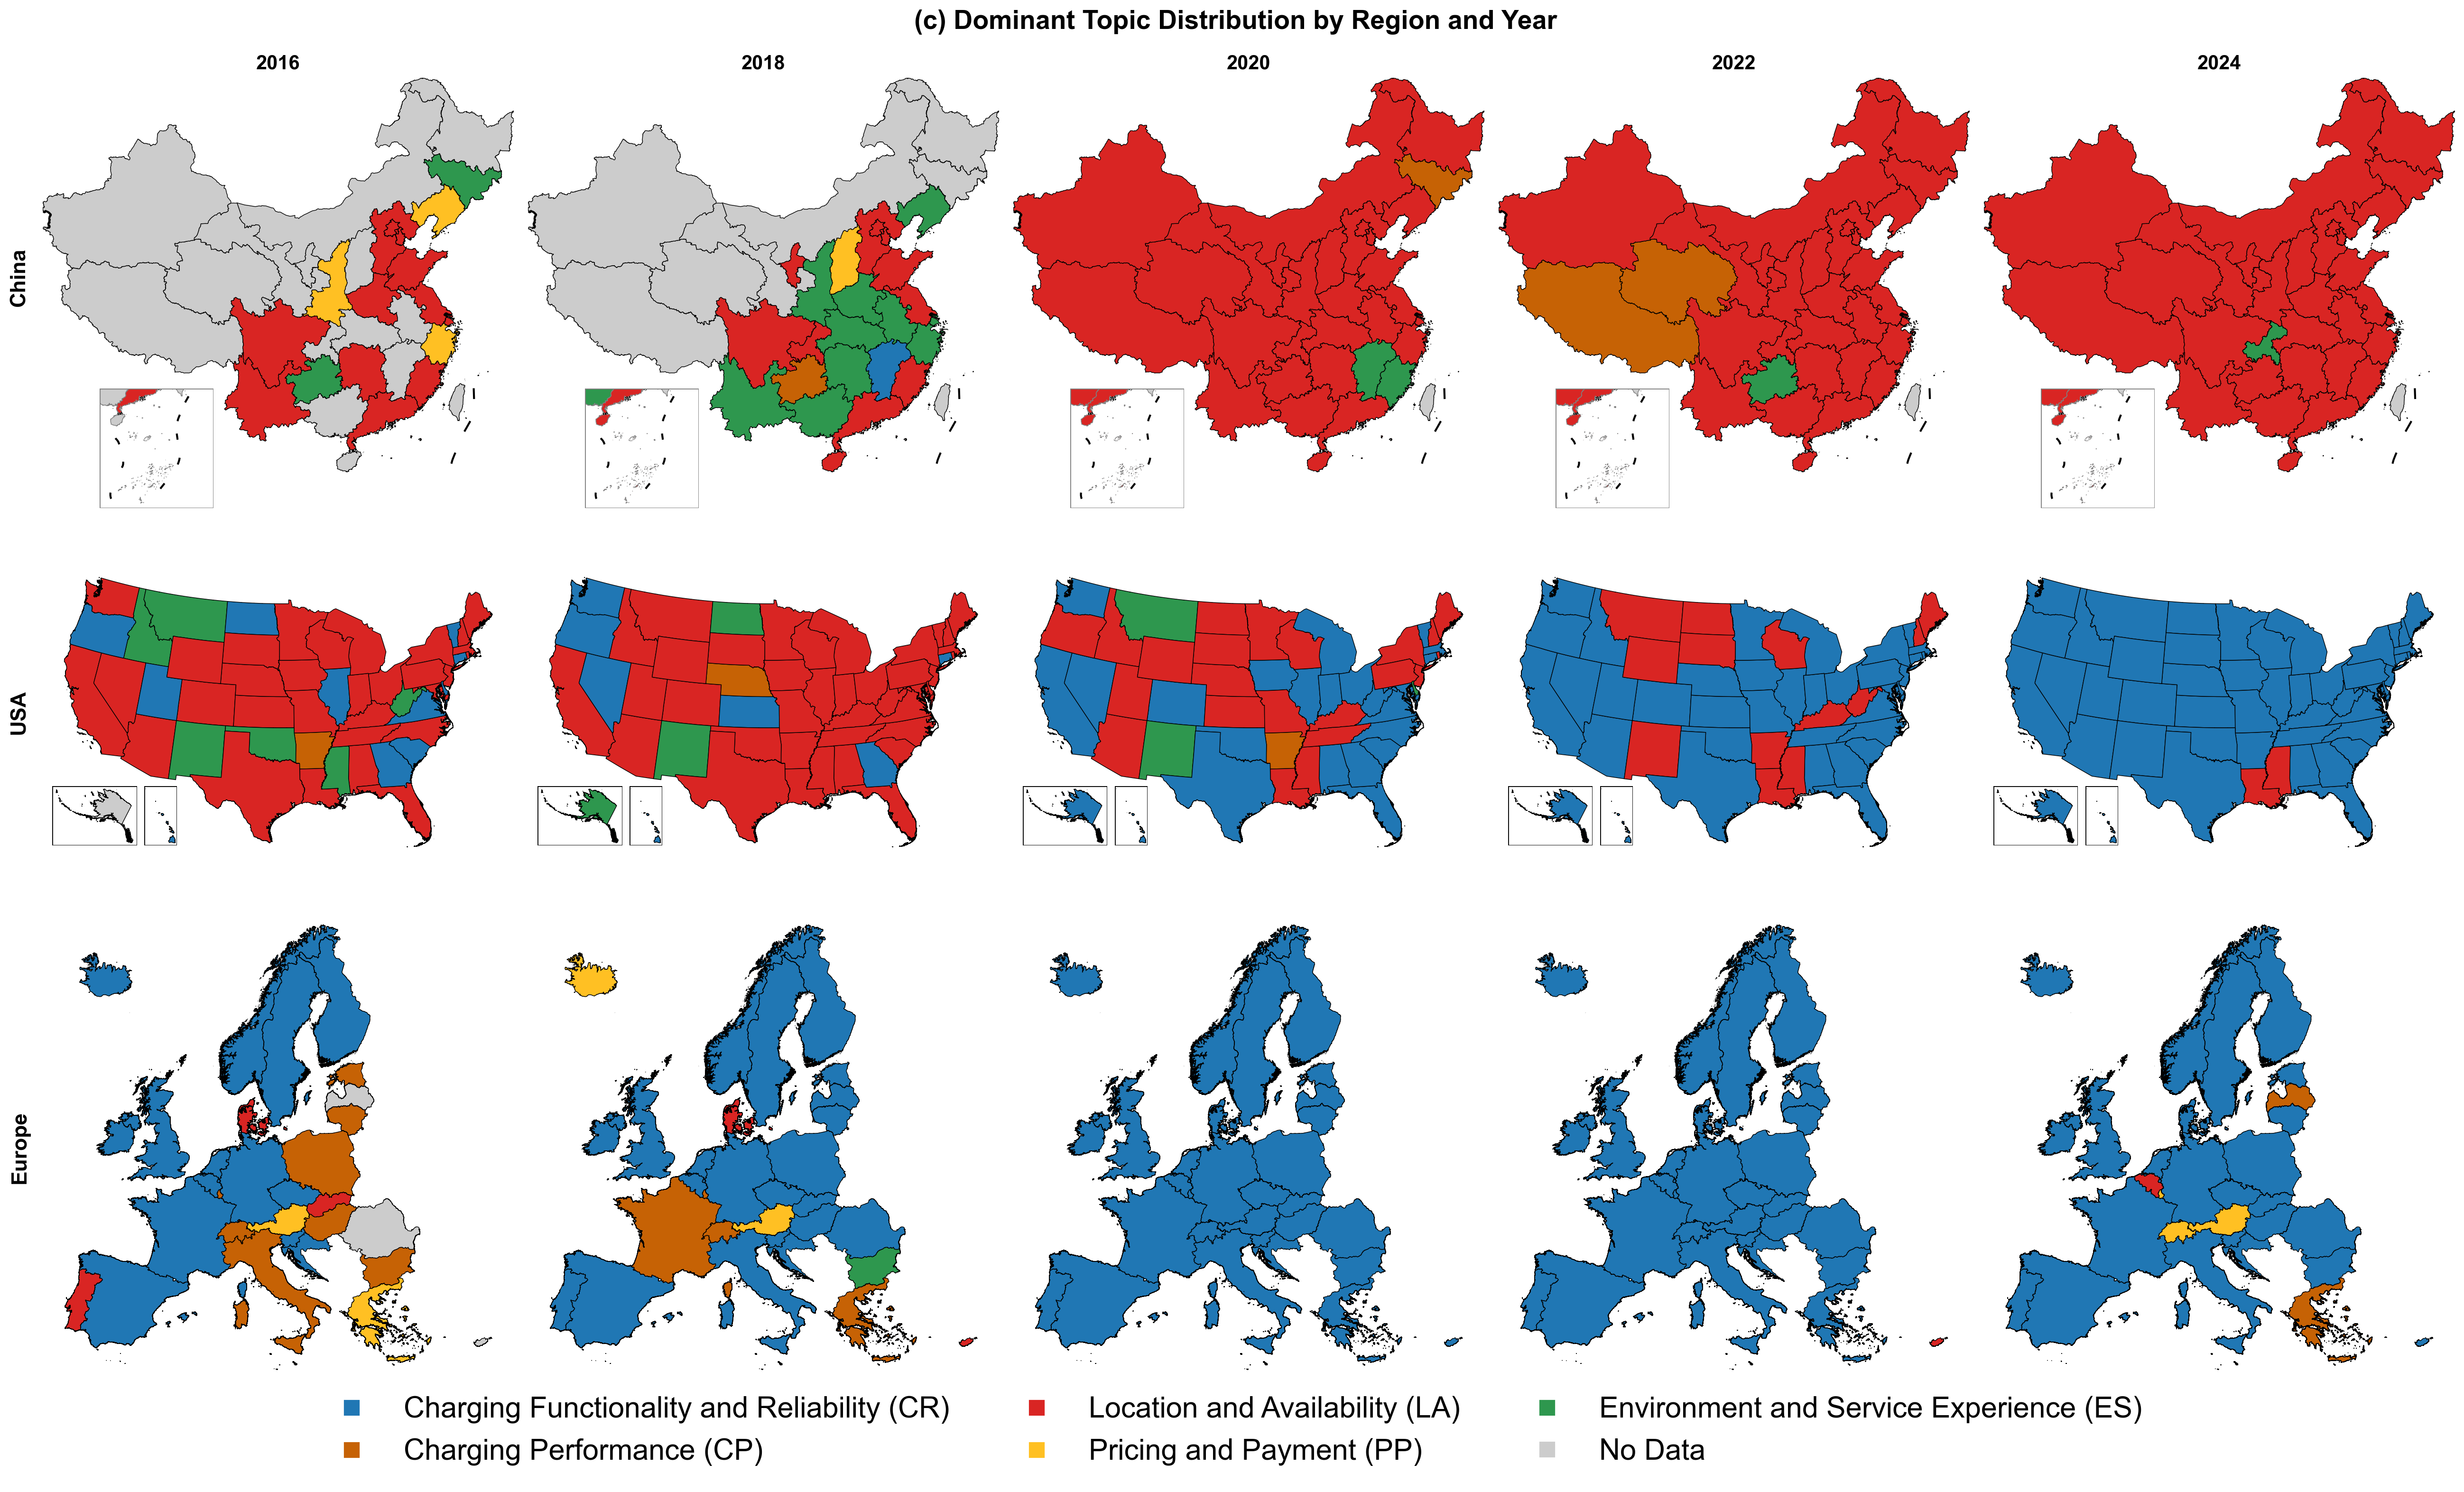

In [19]:
# Fig 3c

import os
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

# Topic coloring
topic_colors = {
    'Charging Functionality and Reliability': '#2077B4',
    'Charging Performance': '#C66205',
    'Location and Availability': '#D92523',
    'Pricing and Payment': '#FFC023',
    'Environment and Service Experience': '#2E974E',
    'No Data': '#CCCCCC'
}
topics = list(topic_colors.keys())

# Topic abbreviations for legend (no abbreviation for No Data)
topic_abbreviations = {
    'Charging Functionality and Reliability': 'CR',
    'Charging Performance': 'CP',
    'Location and Availability': 'LA',
    'Pricing and Payment': 'PP',
    'Environment and Service Experience': 'ES',
    'No Data': ''
}

# File paths
CHINA_SHP_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国省4326_4.shp'
USA_SHP_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/usa/gadm41_USA_1.shp'
EUR_SHP_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/europe/Europe.shp'
CHINA_JSON_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM_TianDiTU_Province.json'
CHINA_NINE_DASH_PATH = 'C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国十段4326.shp'

# Projection definitions
albers_proj_china = "+proj=aea +lat_1=25 +lat_2=47 +lat_0=35 +lon_0=105 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"
albers_proj_usa = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
europe_proj = "+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs"

REGION_CONFIG = {
    'CHN': {
        'csv_path': "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_3_c/china_attribute_table.csv",
        'shp_path': CHINA_SHP_PATH,
        'hasc_col': 'HASC_1',
        'name_col': 'name'
    },
    'USA': {
        'csv_path': "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_3_c/usa_attribute_table.csv",
        'shp_path': USA_SHP_PATH,
        'hasc_col': 'HASC_1'
    },
    'EUR': {
        'csv_path': "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_3_c/europe_attribute_table.csv",
        'shp_path': EUR_SHP_PATH,
        'hasc_col': 'HASC_1'
    }
}

def load_china_hasc_mapping(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        return {v: k for k, v in json.load(f).items()}

def prepare_region_data(year, region_info):
    csv_path = region_info['csv_path']
    if not os.path.exists(csv_path):
        return None
    df = pd.read_csv(csv_path)
    topic_col = f'topic_{str(year)[2:]}'  # e.g., topic_24 for 2024
    if not topic_col in df.columns:
        return None
    if not os.path.exists(region_info['shp_path']):
        return None
    try:
        gdf = gpd.read_file(region_info['shp_path'], engine='pyogrio')
    except Exception:
        gdf = gpd.read_file(region_info['shp_path'])
    if region_info.get('name_col'):
        china_mapping = load_china_hasc_mapping(CHINA_JSON_PATH)
        gdf['HASC_1'] = gdf[region_info['name_col']].map(china_mapping)
    merged = gdf.merge(df, on='HASC_1', how='left')
    merged['final_topic'] = merged[topic_col].fillna('No Data')
    # Project to correct CRS
    if region_info['shp_path'] == CHINA_SHP_PATH:
        merged = merged.to_crs(albers_proj_china)
    elif region_info['shp_path'] == USA_SHP_PATH:
        merged = merged.to_crs(albers_proj_usa)
    elif region_info['shp_path'] == EUR_SHP_PATH:
        merged = merged.to_crs(europe_proj)
    merged['final_topic'] = pd.Categorical(merged['final_topic'], categories=topics, ordered=False)
    merged['color'] = merged['final_topic'].map(topic_colors).fillna(topic_colors['No Data'])
    return merged

years = [2016, 2018, 2020, 2022, 2024]
regions = list(REGION_CONFIG.keys())
fig, axs = plt.subplots(len(regions), len(years), figsize=(26, 16), dpi=200)

for row_idx, region in enumerate(regions):
    region_info = REGION_CONFIG[region]
    for col_idx, year in enumerate(years):
        ax = axs[row_idx, col_idx]
        merged = prepare_region_data(year, region_info)
        if merged is None:
            ax.axis('off')
            continue

        if region == 'USA':
            alaska = merged[merged['HASC_1'] == 'US.AK']
            hawaii = merged[merged['HASC_1'] == 'US.HI']
            mainland = merged[~merged['HASC_1'].isin(['US.AK', 'US.HI'])]
            mainland.plot(ax=ax, color=mainland['color'], edgecolor='black', linewidth=0.5)
            ax.set_axis_off()
            # Alaska inset with frame
            ax_ak = ax.inset_axes([0.01, 0.05, 0.2, 0.2])
            alaska.plot(ax=ax_ak, color=alaska['color'], edgecolor='black', linewidth=0.5)
            ax_ak.set_axis_off()
            ax_ak.add_patch(Rectangle((0, 0), 1, 1, transform=ax_ak.transAxes,
                                      fill=False, edgecolor='black', linewidth=1, zorder=100))
            # Hawaii inset with frame
            ax_hi = ax.inset_axes([0.15, 0.05, 0.2, 0.2])
            hawaii.plot(ax=ax_hi, color=hawaii['color'], edgecolor='black', linewidth=0.5)
            ax_hi.set_axis_off()
            ax_hi.add_patch(Rectangle((0, 0), 1, 1, transform=ax_hi.transAxes,
                                      fill=False, edgecolor='black', linewidth=1, zorder=100))
        elif region == 'CHN':
            xmin, xmax = -2625769, 2207315
            ymin, ymax = -1900000, 2186675
            mainland = merged.cx[xmin:xmax, ymin:ymax]
            mainland.plot(ax=ax, color=mainland['color'], edgecolor='black', linewidth=0.5)
            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)
            ax.set_axis_off()
            # Nine-dash line overlay
            if os.path.exists(CHINA_NINE_DASH_PATH):
                dash_gdf = gpd.read_file(CHINA_NINE_DASH_PATH, engine="pyogrio").to_crs(albers_proj_china)
                dash_gdf.plot(ax=ax, color='black', linewidth=1.5)
            # South China Sea inset with gray frame
            ax_inset = inset_axes(ax, width="25%", height="30%", loc='lower left',
                                  bbox_to_anchor=(0.1, -0.1, 1, 1), bbox_transform=ax.transAxes)
            scs_xmin, scs_xmax = 200000, 2200000
            scs_ymin, scs_ymax = -3300000, -1200000
            islands = merged.cx[scs_xmin:scs_xmax, scs_ymin:scs_ymax]
            islands.plot(ax=ax_inset, color=islands['color'], edgecolor='gray', linewidth=0.5)
            if os.path.exists(CHINA_NINE_DASH_PATH):
                dash_gdf.plot(ax=ax_inset, color='black', linewidth=1.5)
            ax_inset.set_xlim(scs_xmin, scs_xmax)
            ymin1 = -1900000 + 700000
            ax_inset.set_ylim(-3300000, ymin1)
            ax_inset.set_axis_off()
            ax_inset.add_patch(
                Rectangle((0, 0), 1, 1, transform=ax_inset.transAxes,
                          fill=False, edgecolor='gray', linewidth=1, zorder=100)
            )
        elif region == 'EUR':
            merged.plot(ax=ax, color=merged['color'], edgecolor='black', linewidth=0.5)
            ax.set_axis_off()
        # Titles and side region label
        if row_idx == 0:
            ax.set_title(str(year), fontsize=15, fontweight='bold', pad=7)
        if col_idx == 0:
            region_str = {'CHN':'China', 'USA':'USA', 'EUR':'Europe'}[region]
            ax.annotate(region_str, xy=(-0.05, 0.5), xycoords='axes fraction', rotation=90,
                        va='center', ha='center', fontsize=16, fontweight='bold')

# Legend with abbreviations except No Data
legend_labels = [
    f"{label} ({topic_abbreviations[label]})" if label != "No Data" else label
    for label in topics
]
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label=legend_label,
           markerfacecolor=topic_colors[label], markersize=13)
    for label, legend_label in zip(topics, legend_labels)
]
fig.legend(
    handles=legend_elements, loc='lower center', ncol=3,
    fontsize=22, frameon=False
)

fig.suptitle("(c) Dominant Topic Distribution by Region and Year", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.savefig("C:/Users/justi/Downloads/fig_3c.png", dpi=300, bbox_inches='tight')
plt.show()


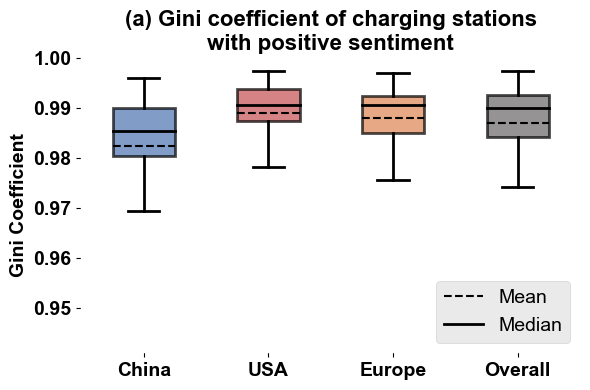

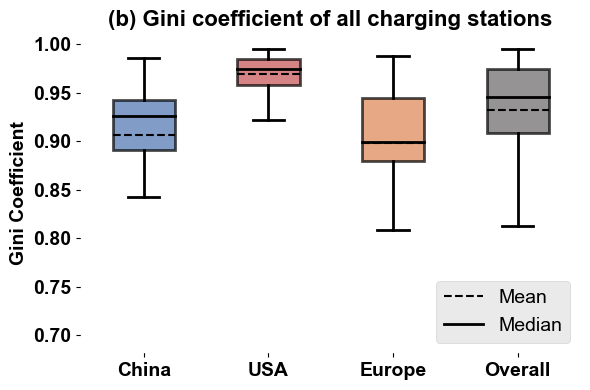

In [12]:
# Fig 4ab

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.style.use('ggplot')

FILE_CONFIG = {
    "sentiment": {
        "files": {
            "China": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/china/Overall sentiment_gini_results.csv",
            "USA": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/usa/Overall sentiment_gini_results.csv",
            "Europe": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/europe/Overall sentiment_gini_results.csv"
        },
        "output_file": "Boxplot_Gini_with_positive.png",
        "title": "(a) Gini coefficient of charging stations\nwith positive sentiment"
    },
    "all_chargers": {
        "files": {
            "China": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/china/china_chargers_gini.csv",
            "USA": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/usa/usa_chargers_gini.csv",
            "Europe": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/europe/europe_chargers_gini.csv"
        },
        "output_file": "Boxplot_Gini_all_chargers.png",
        "title": "(b) Gini coefficient of all charging stations"
    }
}

OUTPUT_DIR = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/figure/fig_4_ab/box_plot"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def create_boxplot(combined_gdf, output_path, title):
    data_to_plot = [
        combined_gdf[combined_gdf['region'] == 'China']['gini'].dropna(),
        combined_gdf[combined_gdf['region'] == 'USA']['gini'].dropna(),
        combined_gdf[combined_gdf['region'] == 'Europe']['gini'].dropna(),
        combined_gdf['gini'].dropna()
    ]
    labels = ['China', 'USA', 'Europe', 'Overall']
    region_colors = {
        'China': '#4C72B0',
        'USA': '#C44E52',
        'Europe': '#DD8452', 
        'Overall': '#696666'
    }
    plt.figure(figsize=(6, 4))
    ax = plt.gca()
    fig = plt.gcf()
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    box_width = 0.5
    box = ax.boxplot(
        data_to_plot,
        patch_artist=True,
        labels=labels,
        showfliers=False,
        widths=box_width,
        boxprops=dict(linewidth=2),
        whiskerprops=dict(linewidth=2),
        capprops=dict(linewidth=2),
        medianprops=dict(color='black', linewidth=2)
    )
    for patch, label in zip(box['boxes'], labels):
        patch.set_facecolor(region_colors[label])
        patch.set_alpha(0.7)
    for i, region_data in enumerate(data_to_plot):
        mean_val = region_data.mean()
        left = (i+1) - box_width/2
        right = (i+1) + box_width/2
        ax.hlines(mean_val, left, right, colors='black', linestyles='dashed', linewidth=1.5)
    for i, region in enumerate(labels):
        y = data_to_plot[i]
        x = np.random.normal(i+1, 0.04, size=len(y))
        ax.plot(x, y, 'o', color=region_colors[region], alpha=0, markersize=4, markeredgewidth=0)
    legend_elements = [
        Line2D([0], [0], color='black', linestyle='dashed', lw=1.5, label='Mean'),
        Line2D([0], [0], color='black', lw=2, label='Median')
    ]
    legend = ax.legend(handles=legend_elements, loc='lower right', fontsize=14)
    for text in legend.get_texts():
        text.set_color('black')
    plt.title(title, fontsize=16, fontweight='bold', color='black')
    plt.ylabel('Gini Coefficient', fontsize=14, fontweight='bold', color='black')
    # plt.xlabel('Region', fontsize=14, fontweight='bold', color='black')
    ax.tick_params(axis='both', which='major', labelsize=12, colors='black')
    plt.xticks(fontsize=14, weight='bold', color='black')
    plt.yticks(fontsize=14, weight='bold', color='black')
    ax.grid(axis='y', linestyle='--', alpha=0)
    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    plt.close()

def load_data(file_config):
    all_regions = []
    for region_name, file_path in file_config["files"].items():
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['region'] = region_name
            all_regions.append(df)
        else:
            print(f"File not found: {file_path}")
    if not all_regions:
        raise ValueError("No valid data files were found.")
    combined_gdf = pd.concat(all_regions, ignore_index=True)
    combined_gdf['Overall'] = 'Overall'
    return combined_gdf

def generate_boxplots():
    for key in ["sentiment", "all_chargers"]:
        try:
            combined_data = load_data(FILE_CONFIG[key])
            output_path = os.path.join(OUTPUT_DIR, FILE_CONFIG[key]["output_file"])
            create_boxplot(combined_data, output_path, FILE_CONFIG[key]["title"])
        except Exception as e:
            print(f"Error in generating {key} boxplot: {str(e)}")

generate_boxplots()


C:\Users\justi\AppData\Local\Temp\ipykernel_16140\793367647.py:146: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0, w_pad=0)


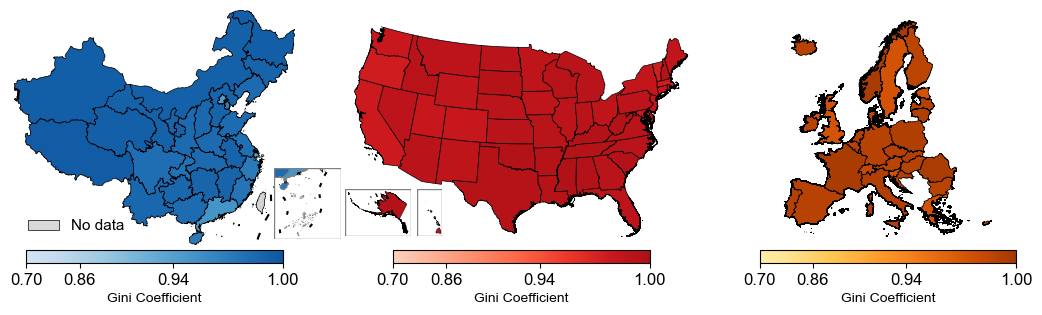

C:\Users\justi\AppData\Local\Temp\ipykernel_16140\793367647.py:146: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0, w_pad=0)


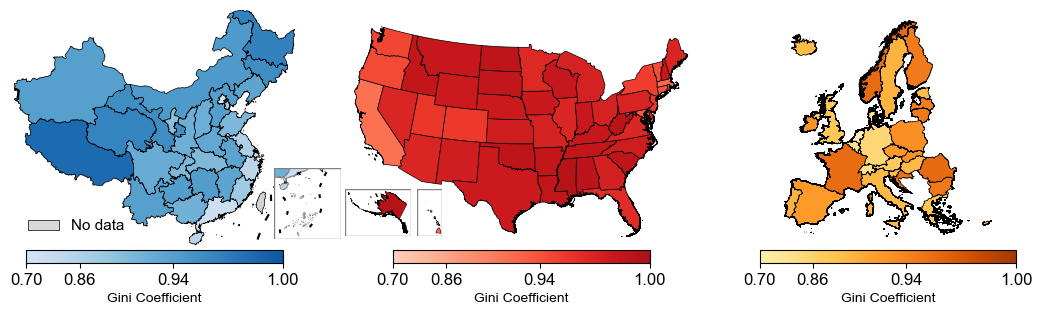

In [9]:
# Fig 4ab (Map)

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.colors import PowerNorm, ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import os

plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'Arial',
    'axes.unicode_minus': False,
})

def _get_light_cmap(base_cmap, lo=0.18, hi=0.85, N=256):
    base = plt.get_cmap(base_cmap)
    return ListedColormap(base(np.linspace(lo, hi, N)))

def plot_gini_map(
    china_csv, usa_csv, europe_csv, output_png, map_title,
    china_shp, usa_shp, europe_shp, china_nine_dash,
    vmin=0.7, vmax=1.0, ticks=[0.7, 0.8, 0.9, 1.0],
    gini_cmap_china='Blues', gini_cmap_usa='Reds', gini_cmap_europe='YlOrBr'):
    # Projections
    albers_proj_china = "+proj=aea +lat_1=25 +lat_2=47 +lat_0=35 +lon_0=105 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"
    albers_proj_usa = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
    europe_proj = "+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs"
    merge_key = 'HASC_1'
    # Load and merge data
    china_gdf = gpd.read_file(china_shp, engine="pyogrio").merge(
        pd.read_csv(china_csv), on=merge_key, how='left'
    ).to_crs(albers_proj_china)
    usa_gdf = gpd.read_file(usa_shp, engine="pyogrio").merge(
        pd.read_csv(usa_csv), on=merge_key, how='left'
    ).to_crs(albers_proj_usa)
    europe_gdf = gpd.read_file(europe_shp, engine="pyogrio").merge(
        pd.read_csv(europe_csv), on=merge_key, how='left'
    ).to_crs(europe_proj)
    # Create figure with original structure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3), 
                                      gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0})
    # Create a consistent normalization for all plots
    norm = PowerNorm(gamma=2.5, vmin=vmin, vmax=vmax)  # Gamma <1 gives more color variation near 1.0
    # Create colormaps with pastel colors
    cmap_china = _get_light_cmap(gini_cmap_china)
    cmap_usa = _get_light_cmap(gini_cmap_usa)
    cmap_europe = _get_light_cmap(gini_cmap_europe)
    # Common legend parameters
    legend_kwds = {
        'pad': 0.01, 
        'orientation': "horizontal", 
        'aspect': 20, 
        'shrink': 0.7,
        'ticks': ticks, 
        'format': lambda x, _: f"{x:.2f}",
        'label': 'Gini Coefficient', 
        'location': 'bottom'
    }
    # Parameters for NaN values
    missing_kwds = {
        "color": "lightgray",
        "edgecolor": "black",
        "linewidth": 0.5,
        "label": "No data"
    }
    # --- CHINA ---
    mainland = china_gdf.cx[-2625769:2207315, -1900000:2186675]
    mainland.plot(
        column='gini', ax=ax1, edgecolor='black', linewidth=0.5, cmap=cmap_china,
        norm=norm, legend=True, legend_kwds=legend_kwds,
        missing_kwds=missing_kwds
    )
    # Add nine-dash line if exists
    if os.path.exists(china_nine_dash):
        dash_gdf = gpd.read_file(china_nine_dash, engine="pyogrio").to_crs(albers_proj_china)
        dash_gdf.plot(ax=ax1, color='black', linewidth=1.5)
    ax1.set_xlim(-2625769, 2207315)
    ax1.set_ylim(-1900000, 2186675)
    ax1.set_axis_off()
    # --- CHINA INSET ---
    ax1_inset = inset_axes(ax1, width="25%", height="30%", loc='lower right', 
                          bbox_to_anchor=(0.2, 0, 1, 1), bbox_transform=ax1.transAxes)
    islands = china_gdf.cx[200000:2200000, -3300000:-1200000]
    islands.plot(
        column='gini', ax=ax1_inset, edgecolor='gray', linewidth=0.5, cmap=cmap_china,
        norm=norm, legend=False,
        missing_kwds=missing_kwds
    )
    if os.path.exists(china_nine_dash):
        dash_gdf.plot(ax=ax1_inset, color='black', linewidth=1.5)
    ax1_inset.set_xlim(200000, 2200000)
    ax1_inset.set_ylim(-3300000, -1200000)
    ax1_inset.set_axis_off()
    ax1_inset.add_patch(
        Rectangle((0, 0), 1, 1, transform=ax1_inset.transAxes,
                 fill=False, edgecolor='gray', linewidth=1, zorder=100)
    )
    # --- USA ---
    alaska = usa_gdf[usa_gdf['HASC_1'] == 'US.AK']
    hawaii = usa_gdf[usa_gdf['HASC_1'] == 'US.HI']
    continental = usa_gdf[~usa_gdf['HASC_1'].isin(['US.AK', 'US.HI'])]
    continental.plot(
        column='gini', ax=ax2, cmap=cmap_usa, edgecolor='black', linewidth=0.5,
        norm=norm, legend=True, legend_kwds=legend_kwds,
        missing_kwds=missing_kwds
    )
    ax2.axis('off')
    
    # Alaska and Hawaii insets
    ax_ak = ax2.inset_axes([0.01, 0.05, 0.2, 0.2])
    alaska.plot(column='gini', ax=ax_ak, cmap=cmap_usa, edgecolor='black', linewidth=0.3, norm=norm,
               missing_kwds=missing_kwds)
    ax_ak.axis('off')
    ax_hi = ax2.inset_axes([0.15, 0.05, 0.2, 0.2])
    hawaii.plot(column='gini', ax=ax_hi, cmap=cmap_usa, edgecolor='black', linewidth=0.3, norm=norm,
               missing_kwds=missing_kwds)
    ax_hi.axis('off')
    for ax_inset in [ax_ak, ax_hi]:
        ax_inset.add_patch(
            Rectangle((0, 0), 1, 1, transform=ax_inset.transAxes, 
                     fill=False, edgecolor='gray', linewidth=1)
        )
    # --- EUROPE ---
    europe_gdf.plot(
        column='gini', ax=ax3, edgecolor='black', linewidth=0.5, cmap=cmap_europe,
        norm=norm, legend=True, legend_kwds=legend_kwds,
        missing_kwds=missing_kwds
    )
    ax3.axis('off')
    # --- Custom legend entry for "No data" ---
    handles = [Patch(facecolor='#d9d9d9', edgecolor='black', linewidth=0.5, label='No data')]
    ax1.legend(handles=handles, loc='lower left', fontsize=11, frameon=False, fancybox=False)

    # ========== MODIFY COLORBAR LABELS ========== #
    for ax in [ax1, ax2, ax3]:
        for mappable in ax.collections:
            if hasattr(mappable, 'colorbar') and mappable.colorbar is not None:
                mappable.colorbar.set_label('Gini coefficient', fontsize=12, fontweight='bold')
    # ============================================ #

    plt.tight_layout(pad=0, w_pad=0)
    plt.savefig(output_png, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# [Your calls as before]
plot_gini_map(
    china_csv = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/china/Overall sentiment_gini_results.csv",
    usa_csv   = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/usa/Overall sentiment_gini_results.csv",
    europe_csv= "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/europe/Overall sentiment_gini_results.csv",
    output_png= "C:/Users/justi/Downloads/fig_4a_map.png",
    map_title = "(a) Spatial distribution of Gini coefficient for charging stations\nwith positive sentiment",
    china_shp = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国省4326_4.shp",
    usa_shp   = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/usa/gadm41_USA_1.shp",
    europe_shp= "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/europe/Europe.shp",
    china_nine_dash="C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国十段4326.shp",
    vmin=0.70, vmax=1.0,
    ticks=[0.70, 0.86, 0.94, 1.00],
    gini_cmap_china='Blues',
    gini_cmap_usa='Reds',
    gini_cmap_europe='YlOrBr'
)
plot_gini_map(
    china_csv = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/china/china_chargers_gini.csv",
    usa_csv   = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/usa/usa_chargers_gini.csv",
    europe_csv= "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_ab/europe/europe_chargers_gini.csv",
    output_png= "C:/Users/justi/Downloads/fig_4b_map.png",
    map_title = "(b) Spatial distribution of Gini coefficient for all charging stations",
    china_shp = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国省4326_4.shp",
    usa_shp   = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/usa/gadm41_USA_1.shp",
    europe_shp= "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/europe/Europe.shp",
    china_nine_dash="C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国十段4326.shp",
    vmin=0.70, vmax=1.0,
    ticks=[0.70, 0.86, 0.94, 1.00],
    gini_cmap_china='Blues',
    gini_cmap_usa='Reds',
    gini_cmap_europe='YlOrBr'
)


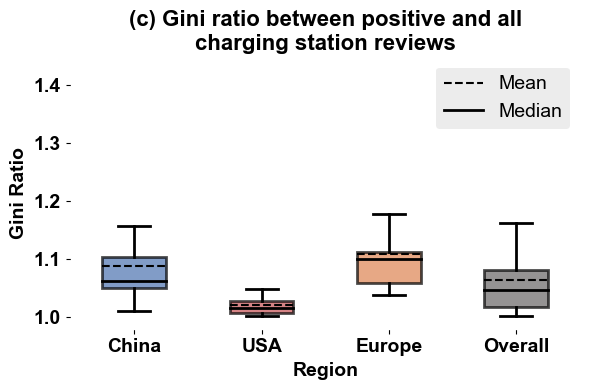

In [14]:
# Fig 4c

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.style.use('ggplot')

CSV_PATHS = {
    "China": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_c/ratio/China/gini_ratio_China.csv",
    "USA": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_c/ratio/USA/gini_ratio_USA.csv",
    "Europe": "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_c/ratio/Europe/gini_ratio_Europe.csv"
}
output_path = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/figure/fig_4_c/gini_ratio_box_plot.png"

def plot_gini_boxplots():
    try:
        all_regions = []
        for region_name, csv_path in CSV_PATHS.items():
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path)
                df['region'] = region_name
                all_regions.append(df)
            else:
                print(f"Warning: File not found - {csv_path}")
        if not all_regions:
            print("No valid data found for any region")
            return
        combined_df = pd.concat(all_regions, ignore_index=True)
        combined_df['Overall'] = 'Overall'

        region_colors = {
            'China': '#4C72B0',
            'USA':   '#C44E52',
            'Europe': '#DD8452',
            'Overall': '#696666'
        }
        data_to_plot = [
            combined_df[combined_df['region'] == 'China']['gini_ratio'].dropna(),
            combined_df[combined_df['region'] == 'USA']['gini_ratio'].dropna(),
            combined_df[combined_df['region'] == 'Europe']['gini_ratio'].dropna(),
            combined_df['gini_ratio'].dropna()
        ]
        labels = ['China', 'USA', 'Europe', 'Overall']
        box_width = 0.5

        plt.figure(figsize=(6, 4))
        ax = plt.gca()
        fig = plt.gcf()
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')  # White axes background

        box = ax.boxplot(
            data_to_plot,
            patch_artist=True,
            labels=labels,
            showfliers=False,
            widths=box_width,
            boxprops=dict(linewidth=2),
            whiskerprops=dict(linewidth=2),
            capprops=dict(linewidth=2),
            medianprops=dict(color='black', linewidth=2)
        )
        for patch, label in zip(box['boxes'], labels):
            patch.set_facecolor(region_colors[label])
            patch.set_alpha(0.7)
        for i, region_data in enumerate(data_to_plot):
            mean_val = region_data.mean()
            left = (i+1) - box_width/2
            right = (i+1) + box_width/2
            ax.hlines(mean_val, left, right, colors='black', linestyles='dashed', linewidth=1.5)
        for i, region in enumerate(labels):
            y = data_to_plot[i]
            x = np.random.normal(i+1, 0.04, size=len(y))
            ax.plot(x, y, 'o', color=region_colors[region], alpha=0, markersize=4, markeredgewidth=0)

        legend_elements = [
            Line2D([0], [0], color='black', linestyle='dashed', lw=1.5, label='Mean'),
            Line2D([0], [0], color='black', lw=2, label='Median')
        ]
        legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=14, frameon=True)
        if legend is not None:
            legend.get_frame().set_facecolor('#ECECEC')  # Set legend bg to grey
            legend.get_frame().set_edgecolor('none')       # No border
            legend.get_frame().set_alpha(1)
        for text in legend.get_texts():
            text.set_color('black')

        ax.set_title("(c) Gini ratio between positive and all\ncharging station reviews", fontsize=16, fontweight='bold', color='black')
        ax.set_ylabel('Gini Ratio', fontsize=14, fontweight='bold', color='black')
        ax.set_xlabel('Region', fontsize=14, fontweight='bold', color='black')
        ax.tick_params(axis='both', which='major', labelsize=12, colors='black')
        plt.xticks(fontsize=14, weight='bold', color='black')
        plt.yticks(fontsize=14, weight='bold', color='black')
        ax.grid(axis='y', linestyle='--', alpha=0)
        plt.tight_layout()
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
    except Exception as e:
        print(f"Error creating boxplot: {str(e)}")

plot_gini_boxplots()


C:\Users\justi\AppData\Local\Temp\ipykernel_4372\1021312329.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0, w_pad=0)


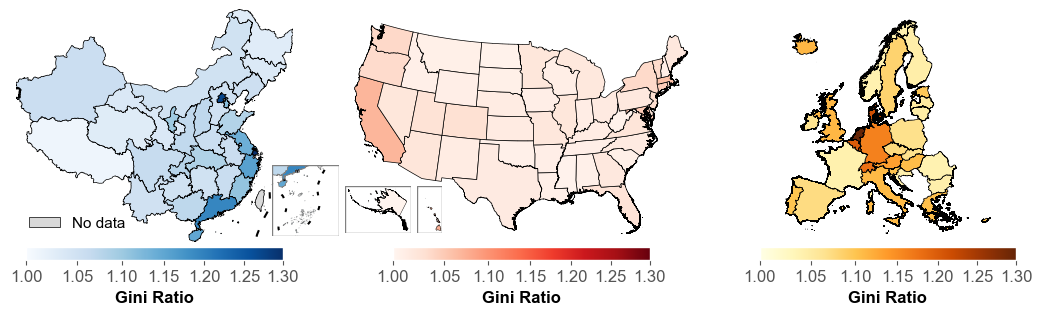

In [15]:
# Fig 4c (Map)

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
import os
from matplotlib.colors import PowerNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'Arial',
    'axes.unicode_minus': False,
})

def plot_gini_ratio_map(china_csv, usa_csv, europe_csv, output_png, map_title,
                  china_shp, usa_shp, europe_shp, china_nine_dash,
                  vmin, vmax, ticks, cmap_china, cmap_usa, cmap_europe):

    albers_proj_china = "+proj=aea +lat_1=25 +lat_2=47 +lat_0=35 +lon_0=105 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs"
    albers_proj_usa = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
    europe_proj = "+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs"

    merge_key = 'HASC_1'

    # Merge and project for each region
    china_gdf = gpd.read_file(china_shp, engine="pyogrio").merge(
        pd.read_csv(china_csv), on=merge_key, how='left'
    ).to_crs(albers_proj_china)
    usa_gdf = gpd.read_file(usa_shp, engine="pyogrio").merge(
        pd.read_csv(usa_csv), on=merge_key, how='left'
    ).to_crs(albers_proj_usa)
    europe_gdf = gpd.read_file(europe_shp, engine="pyogrio").merge(
        pd.read_csv(europe_csv), on=merge_key, how='left'
    ).to_crs(europe_proj)

    norm = PowerNorm(gamma=0.9, vmin=vmin, vmax=vmax)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3), gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0})

    # CHINA (mainland)
    mainland = china_gdf.cx[-2625769:2207315, -1900000:2186675]
    # Plot polygons with data
    main_with = mainland[mainland['gini_ratio'].notnull()]
    main_without = mainland[mainland['gini_ratio'].isnull()]
    main_with.plot(
        column='gini_ratio', ax=ax1, edgecolor='black', linewidth=0.5, cmap=cmap_china,
        legend=True, norm=norm,
        legend_kwds={
            'pad': 0.01, 'orientation': "horizontal", 'aspect': 20, 'shrink': 0.7,
            'ticks': ticks, 'format': lambda x, _: f"{x:.2f}",
            'label': 'Gini Ratio', 'location': 'bottom'
        }
    )
    if not main_without.empty:
        main_without.plot(ax=ax1, color='#d9d9d9', edgecolor='black', linewidth=0.5, zorder=0)
    cbar_ax = ax1.get_figure().axes[-1]
    cbar_ax.set_xlabel('Gini Ratio', fontsize=12, fontweight='bold')
    if os.path.exists(china_nine_dash):
        dash_gdf = gpd.read_file(china_nine_dash, engine="pyogrio").to_crs(albers_proj_china)
        dash_gdf.plot(ax=ax1, color='black', linewidth=1.5)
    ax1.set_xlim(-2625769, 2207315)
    ax1.set_ylim(-1900000, 2186675)
    ax1.set_axis_off()

    # Inset for islands
    ax1_inset = inset_axes(ax1, width="25%", height="30%", loc='lower right', bbox_to_anchor=(0.2, 0, 1, 1),
                           bbox_transform=ax1.transAxes)
    islands = china_gdf.cx[200000:2200000, -3300000:-1200000]
    islands_with = islands[islands['gini_ratio'].notnull()]
    islands_without = islands[islands['gini_ratio'].isnull()]
    islands_with.plot(
        column='gini_ratio', ax=ax1_inset, edgecolor='gray', linewidth=0.5, cmap=cmap_china,
        legend=False, norm=norm
    )
    if not islands_without.empty:
        islands_without.plot(ax=ax1_inset, color='#d9d9d9', edgecolor='gray', linewidth=0.5, zorder=0)
    if os.path.exists(china_nine_dash):
        dash_gdf.plot(ax=ax1_inset, color='black', linewidth=1.5)
    ax1_inset.set_xlim(200000, 2200000)
    ymin = -1900000
    ax1_inset.set_ylim(-3300000, ymin + 700000)
    ax1_inset.set_axis_off()
    ax1_inset.add_patch(
        Rectangle((0, 0), 1, 1, transform=ax1_inset.transAxes,
                  fill=False, edgecolor='gray', linewidth=1, zorder=100)
    )

    # --- "No Data" patch ONLY on China map ---
    from matplotlib.patches import Patch
    from matplotlib.patches import Patch
    nodata_patch = Patch(facecolor='#d9d9d9', edgecolor='black', linewidth=0.5, label='No data')
    # Move it leftwards: x= -0.04 is about 4% of axes width left of the normal "lower left"
    ax1.legend(handles=[nodata_patch],
            loc='lower left',
        #    bbox_to_anchor=(-0.1, 0),  # (x, y): move left, stay low
            fontsize=11, frameon=False, fancybox=False) # ,borderpad=0.7)

    
    # USA
    alaska = usa_gdf[usa_gdf['HASC_1'] == 'US.AK']
    hawaii = usa_gdf[usa_gdf['HASC_1'] == 'US.HI']
    continental = usa_gdf[~usa_gdf['HASC_1'].isin(['US.AK', 'US.HI'])]
    continental.plot(
        column='gini_ratio', ax=ax2, cmap=cmap_usa, edgecolor='black', linewidth=0.5,
        legend=True, norm=norm,
        legend_kwds={
            'pad': 0.01, 'orientation': "horizontal", 'aspect': 20, 'shrink': 0.7,
            'ticks': ticks, 'format': lambda x, _: f"{x:.2f}",
            'label': 'Gini Ratio', 'location': 'bottom'
        }
    )
    cbar_ax = ax2.get_figure().axes[-1]
    cbar_ax.set_xlabel('Gini Ratio', fontsize=12, fontweight='bold')
    ax2.axis('off')
    ax_ak = ax2.inset_axes([0.01, 0.05, 0.2, 0.2])
    alaska.plot(column='gini_ratio', ax=ax_ak, legend=False, cmap=cmap_usa, edgecolor='black', linewidth=0.3, norm=norm)
    ax_ak.axis('off')
    ax_hi = ax2.inset_axes([0.15, 0.05, 0.2, 0.2])
    hawaii.plot(column='gini_ratio', ax=ax_hi, legend=False, cmap=cmap_usa, edgecolor='black', linewidth=0.3, norm=norm)
    ax_hi.axis('off')
    for ax_inset in [ax_ak, ax_hi]:
        ax_inset.add_patch(Rectangle((0, 0), 1, 1, transform=ax_inset.transAxes, fill=False, edgecolor='gray', linewidth=1))

    # EUROPE
    europe_gdf.plot(
        column='gini_ratio', ax=ax3, edgecolor='black', linewidth=0.5, cmap=cmap_europe,
        legend=True, norm=norm,
        legend_kwds={
            'pad': 0.01, 'orientation': "horizontal", 'aspect': 20, 'shrink': 0.7,
            'ticks': ticks, 'format': lambda x, _: f"{x:.2f}",
            'label': 'Gini Ratio', 'location': 'bottom'
        }
    )
    cbar_ax = ax3.get_figure().axes[-1]
    cbar_ax.set_xlabel('Gini Ratio', fontsize=12, fontweight='bold')
    ax3.axis('off')

  #  plt.suptitle(map_title, y=0.99, fontsize=14, fontweight='bold')
    plt.tight_layout(pad=0, w_pad=0)
    plt.savefig(output_png, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Example usage — only China panel has the "No Data" patch & fill
plot_gini_ratio_map(
    china_csv = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_c/ratio/China/gini_ratio_China.csv",
    usa_csv   = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_c/ratio/USA/gini_ratio_USA.csv",
    europe_csv= "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/fig_4_c/ratio/Europe/gini_ratio_Europe.csv",
    output_png= "C:/Users/justi/Downloads/fig_4c_map.png",
    map_title = "(d) Spatial distribution of Gini ratio\nbetween positive and all charging station reviews",
    china_shp = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国省4326_4.shp",
    usa_shp   = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/usa/gadm41_USA_1.shp",
    europe_shp= "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/GADM/europe/Europe.shp",
    china_nine_dash = "C:/Users/justi/Downloads/LLM_bert_comment_code_v2/data/TianDiTu/中国十段4326.shp",
    vmin = 1.00,
    vmax = 1.30,
    ticks = [1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 1.30],
    cmap_china='Blues',
    cmap_usa='Reds',
    cmap_europe='YlOrBr'
)